start_time_sec -> inclusive  
end_time_sec -> inclusive

In [1]:
%matplotlib inline
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sys
from pg import DB
import configparser

In [43]:
def aggregate_data(min_bins_start,df, volume):
    i = 1
    j = 1
    v = []
    for var in range(len(min_bins_start)-1):
        a = min_bins_start[var]
        b = min_bins_start[var+1]
        # i points to the scoot bin immediately before interested time period
        while df['seconds'].iloc[i] < a:
            #rint(df['seconds'].iloc[i], a)
            i = i + 1
        i = i - 1
        # j points to the scoot bin immediately after interested time period
        while df['seconds'].iloc[j] < b and j!=len(df)-1:
            j = j + 1
        if j - i == 1: # [i,a,b,j]
            v.append(df[volume].iloc[i]/df['CycleTime'].iloc[i]*(b-a))
        elif j - i == 2: # [i,a,i+1(j-1),b,j]
            v.append(df[volume].iloc[i]*((df['seconds'].iloc[i+1]-a)/df['CycleTime'].iloc[i])+df[volume].iloc[j-1]*((b-df['seconds'].iloc[j-1])/df['CycleTime'].iloc[j-1]))
        else:   # [i,a,i+1,i+2,...,j-1,b,j]
            vt = 0
            for k in range(j-1-(i+1)):
                vt = vt + df[volume].iloc[i+k+1]
            v.append(vt+df[volume].iloc[i]*((df['seconds'].iloc[i+1]-a)/df['CycleTime'].iloc[i])+df[volume].iloc[j-1]*((b-df['seconds'].iloc[j-1])/df['CycleTime'].iloc[j-1]))
    return v


In [15]:
def aggregate_lanes(df,aggregation):
    cnt = 0
    for lst in aggregation:
        df['detector'+str(cnt)] = df[lst].sum(axis=1)
        cnt = cnt + 1
    return df

In [137]:
def add_y_eq_x(ax, label):
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, label = label)
    

In [16]:
CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
db = DB(dbname=dbset['database'],host=dbset['host'],user=dbset['user'],passwd=dbset['password'])

In [101]:
centrelines = [3304786,446523,30018925,30018925,1147201,1147201,1147026,1147466,8540609,8571185,11466484,1141946]
dir_bins = [1,-1,1,-1,1,-1,1,1,1,-1,1,-1]
sdetectors = [['\'N12921J1\'','\'N12921J2\''],['\'N12931A1\'','\'N12931A2\''],['\'N12821C1\'','\'N12821C2\'','\'N12821C3\''],['\'N12851G1\'','\'N12851G2\''],['\'N30431K1\'','\'N30431K2\''],['\'N30421B1\'','\'N30421B2\''],['\'N30611K1\'','\'N30611K2\''],['\'N30311D1\'','\'N30311D2\''],['\'N21521K1\''],['\'N21521H1\''],['\'N21421D1\''],['\'N21311B1\'']]
locations = ['Don Mills NB N of Overlea','Don Mills SB S of Gateway','Don Mills NB N of Clock Tower','Don Mills SB S of Lawrence','Lake Shore EB E of Stadium','Lake Shore WB W of Bathurst','Lake Shore EB E of Spadina','Lake Shore EB E of Ontario Place','Bloor EB W of Castle Frank','Bloor WB E of Castle Frank','Bloor EB E of Church','Bloor WB W of Church']
aggregation = [[['lane1','lane2'],['lane3']],
               [['lane1','lane2'],['lane3']],
               [['lane1'],['lane2'],['lane3']],
               [['lane2','lane3'],['lane1']],
               [['lane1','lane2'],['lane3']],
               [['lane3'],['lane1','lane2']],
               [['lane1'],['lane2','lane3']],
               [['lane1'],['lane2','lane3']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']]]
colors = ['r','b','c','k']

In [64]:
scoot = pd.DataFrame(db.query('SELECT * FROM scoot.cycle_level_170419 WHERE detector IN (' + ','.join([y for x in sdetectors for y in x ]) + ')').getresult(), columns = ['count_date','count_time','detector','CycleTime','Volume','occupancy','seconds'])
video = pd.DataFrame(db.query('SELECT * FROM scoot.video_counts').getresult(), columns = ['time_start','time_end','lane1','lane2','lane3','Volume','centreline_id','dir_bin','count_date','seconds'])
video['CycleTime'] = 20

Don Mills NB N of Overlea
Bins = SCOOT Cycles, Video Offset = 0 sec


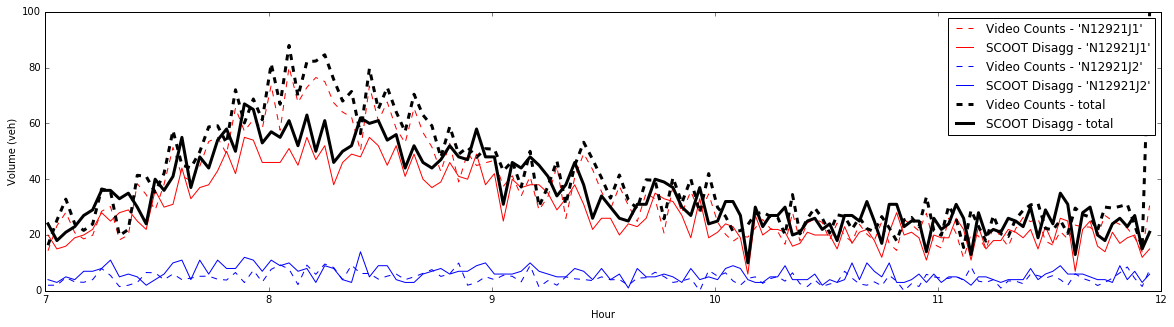

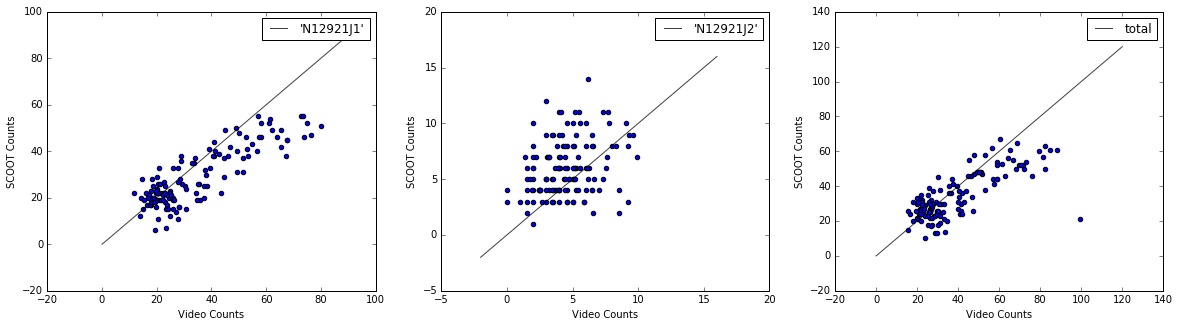

Don Mills SB S of Gateway
Bins = SCOOT Cycles, Video Offset = 0 sec


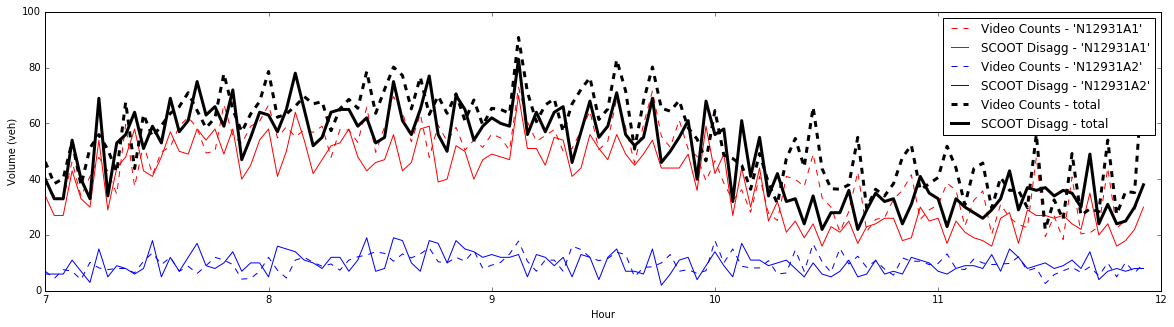

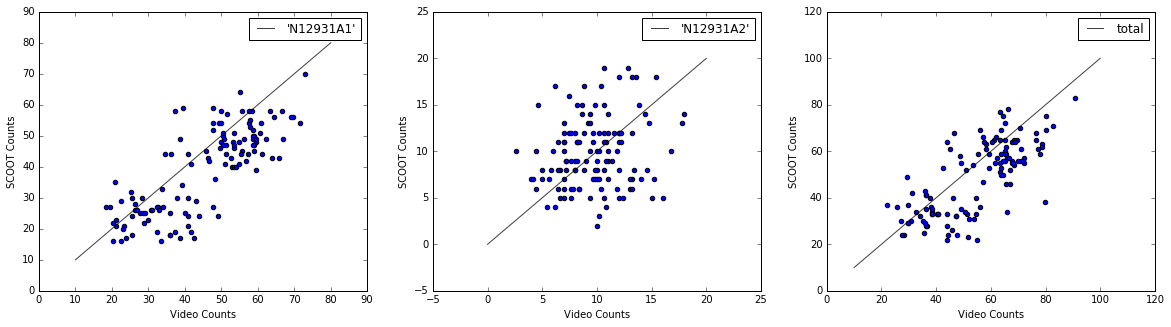

Don Mills NB N of Clock Tower
Bins = SCOOT Cycles, Video Offset = 0 sec


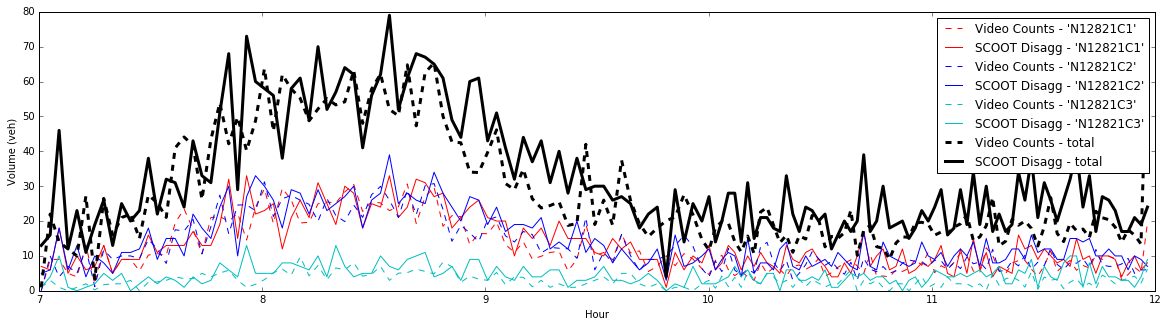

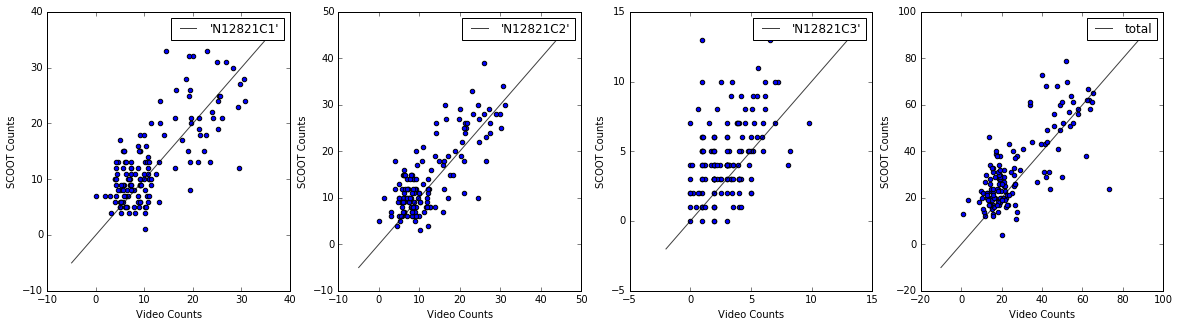

Don Mills SB S of Lawrence
Bins = SCOOT Cycles, Video Offset = 0 sec


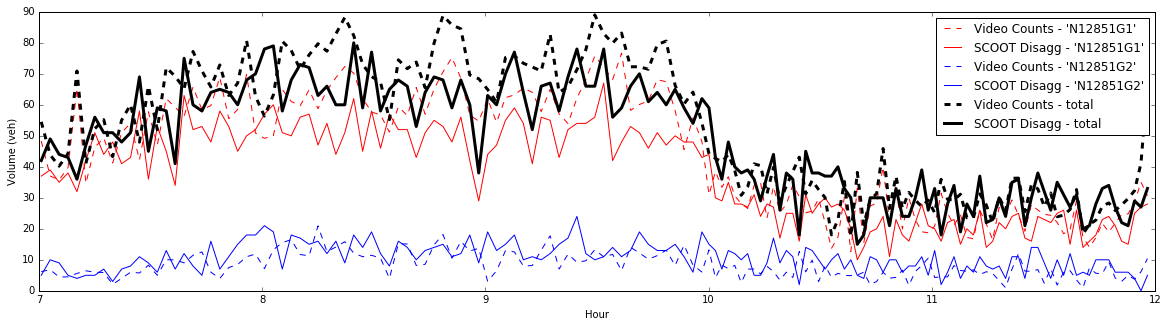

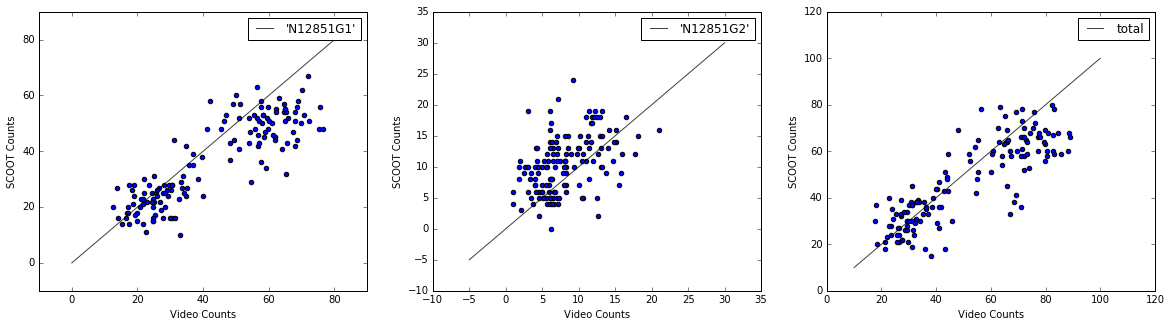

Lake Shore EB E of Stadium
Bins = SCOOT Cycles, Video Offset = 0 sec


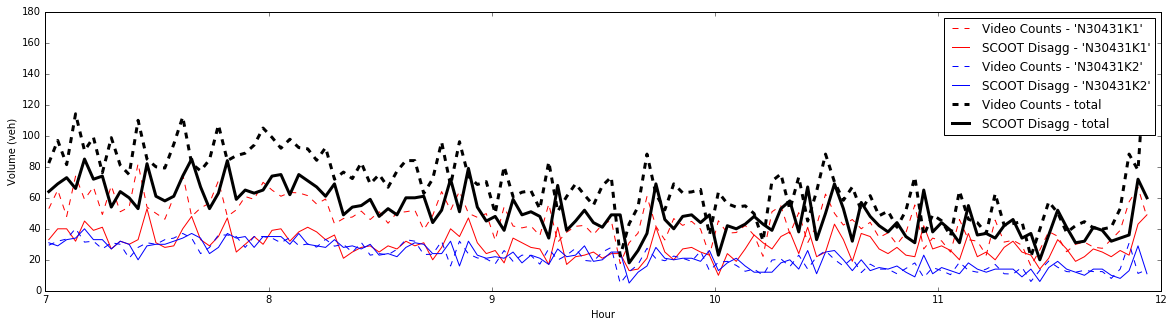

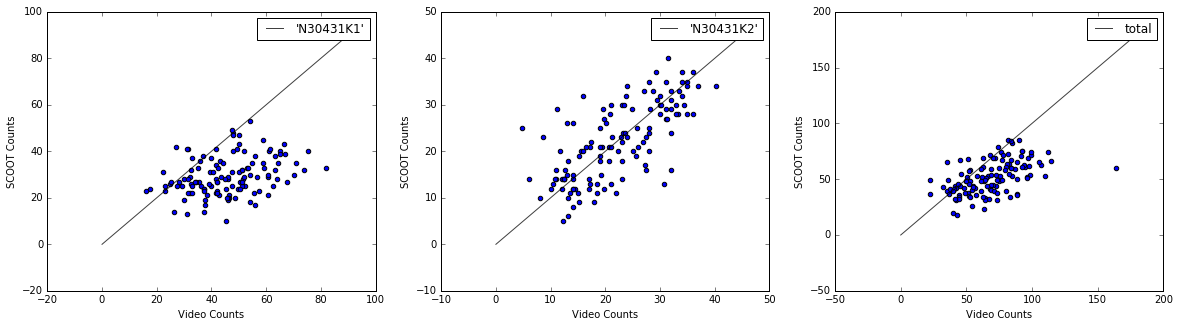

Lake Shore WB W of Bathurst
Bins = SCOOT Cycles, Video Offset = 0 sec


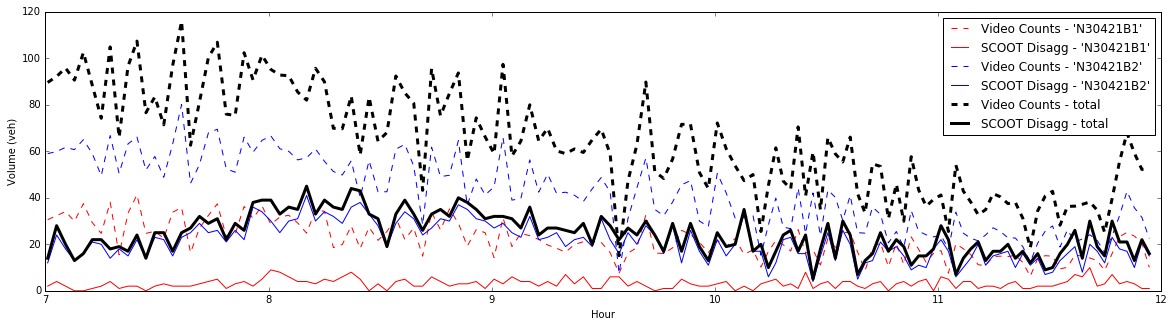

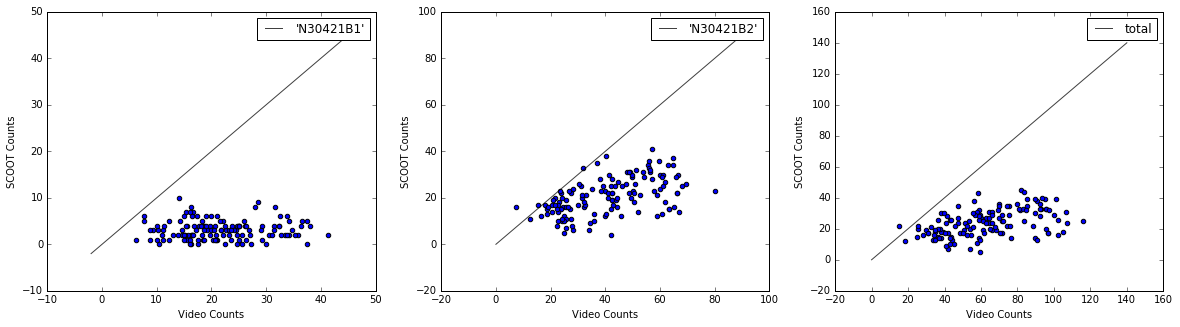

Lake Shore EB E of Spadina
Bins = SCOOT Cycles, Video Offset = 0 sec


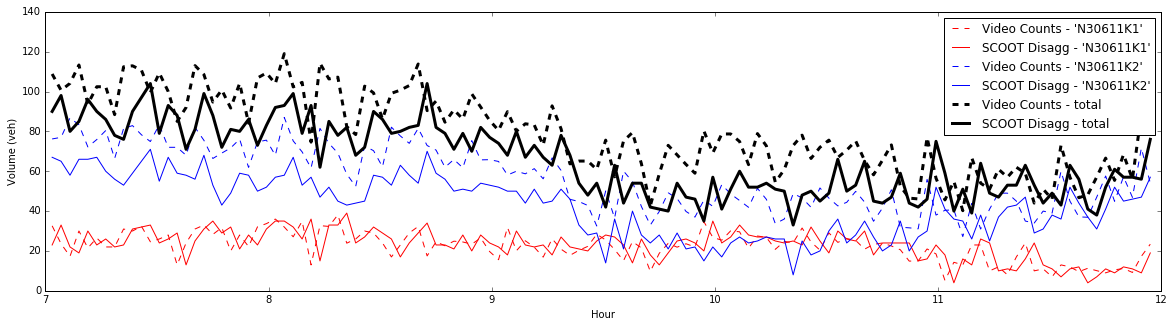

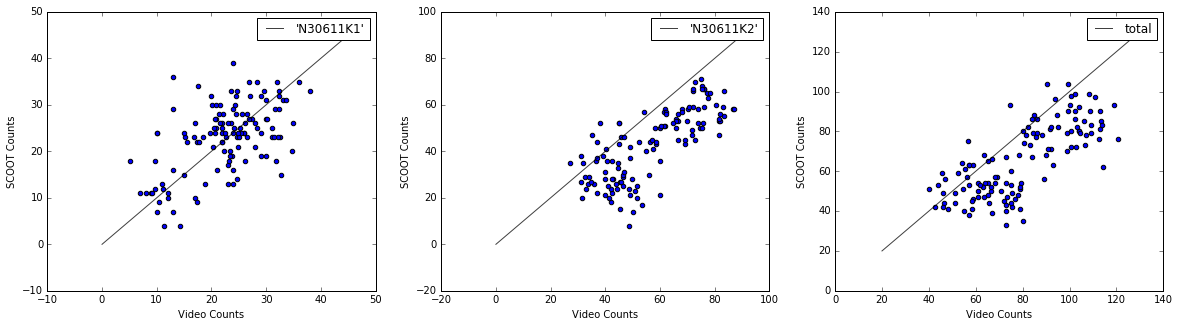

Lake Shore EB E of Ontario Place
Bins = SCOOT Cycles, Video Offset = 0 sec


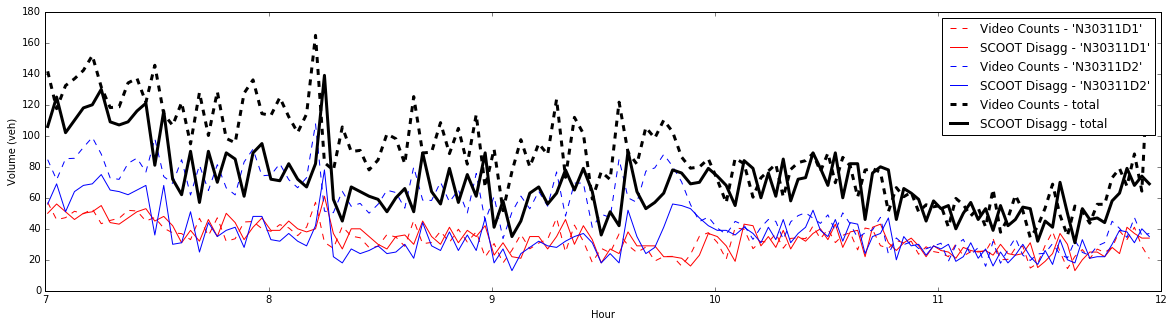

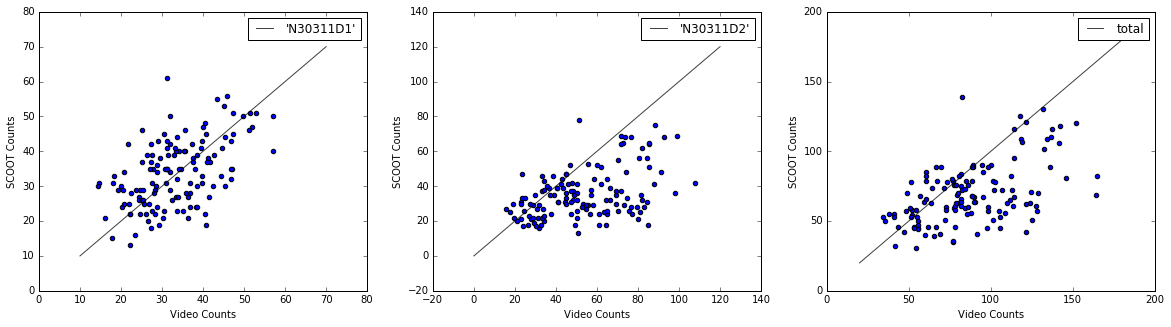

Bloor EB W of Castle Frank
Bins = SCOOT Cycles, Video Offset = 0 sec


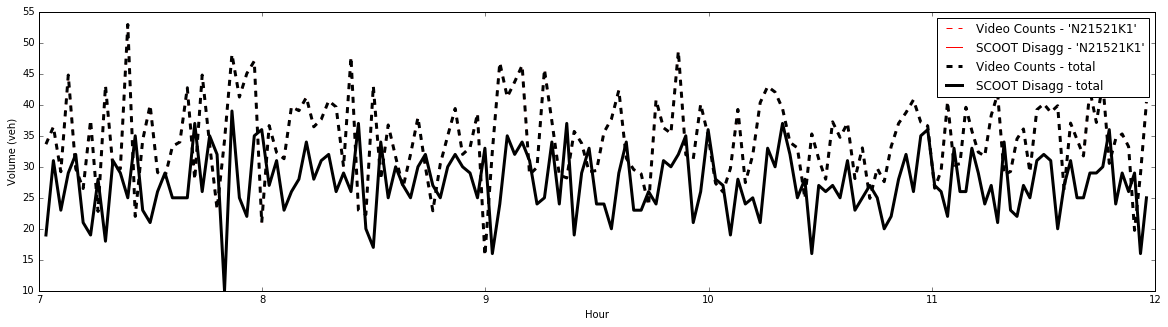

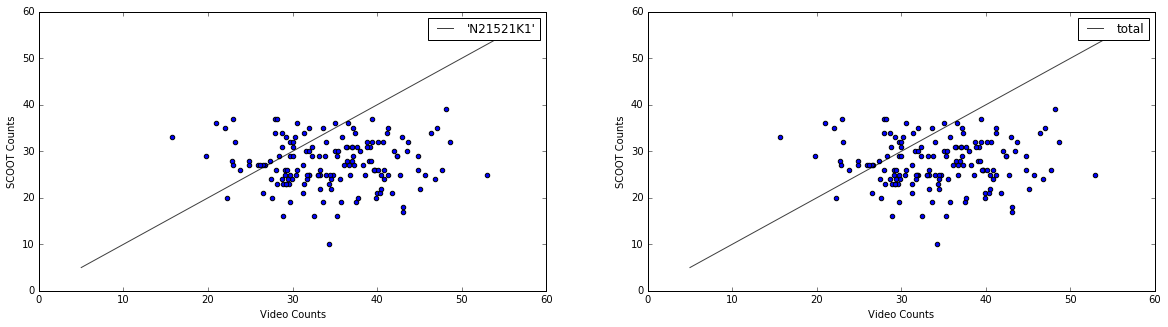

Bloor WB E of Castle Frank
Bins = SCOOT Cycles, Video Offset = 0 sec


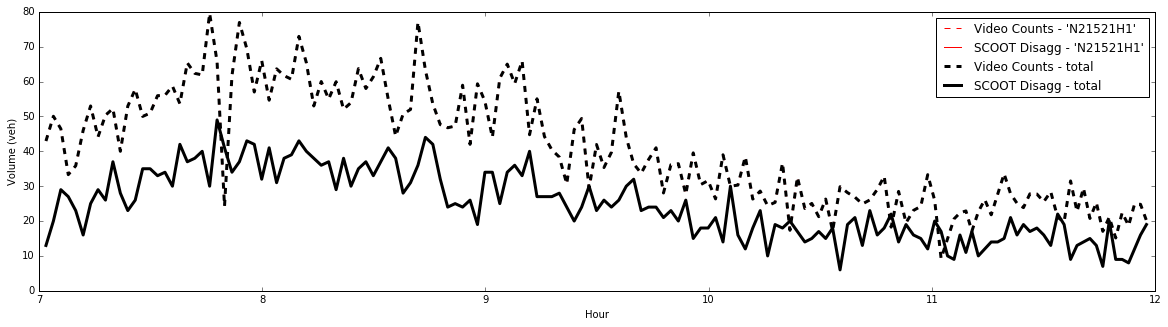

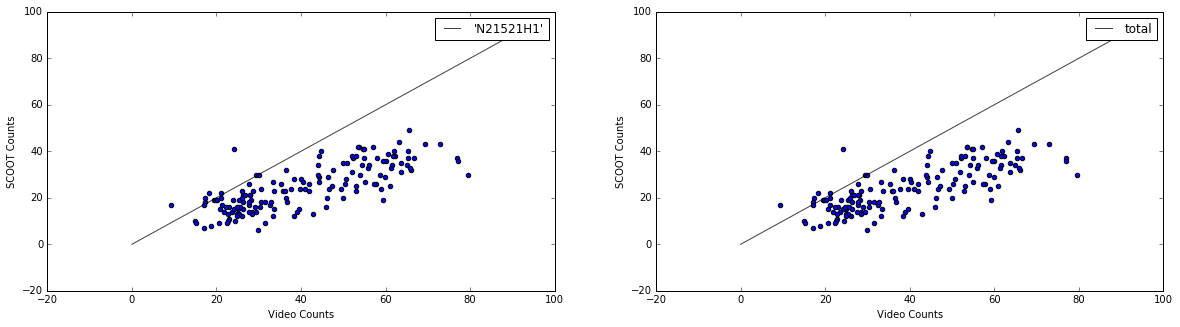

Bloor EB E of Church
Bins = SCOOT Cycles, Video Offset = 0 sec


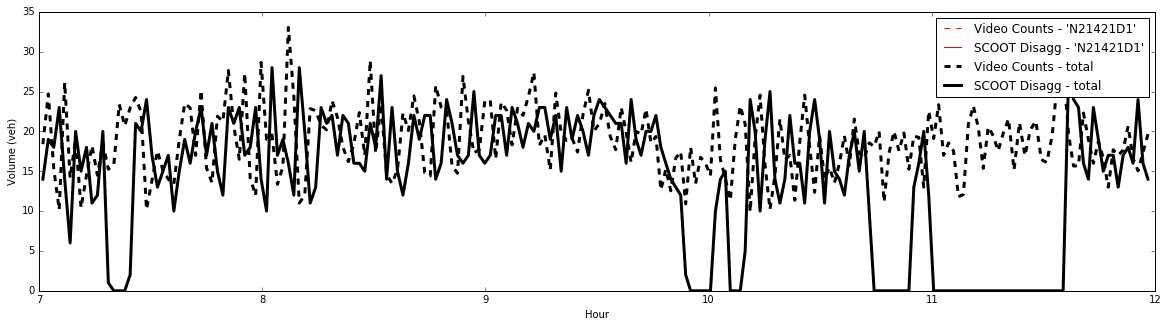

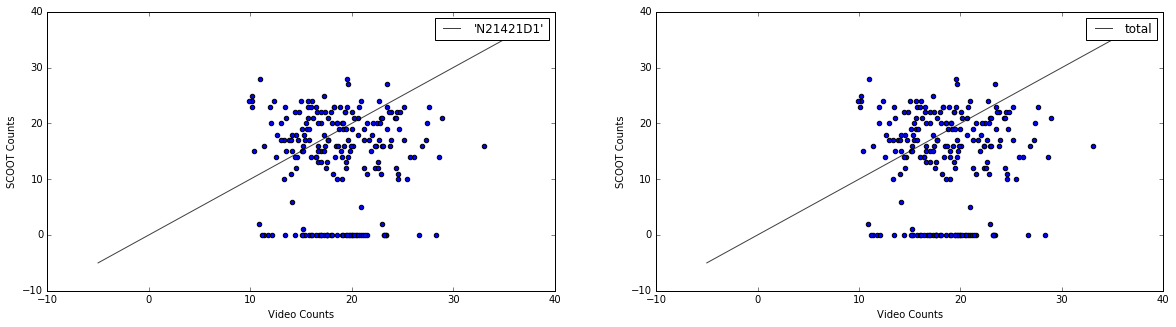

Bloor WB W of Church
Bins = SCOOT Cycles, Video Offset = 0 sec


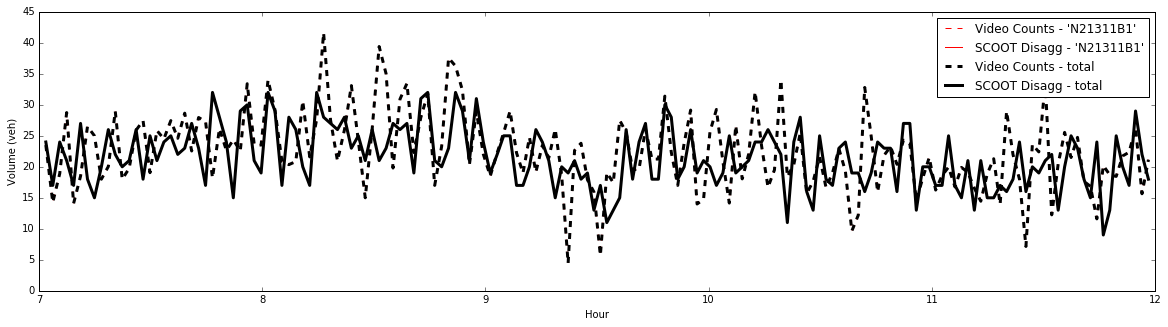

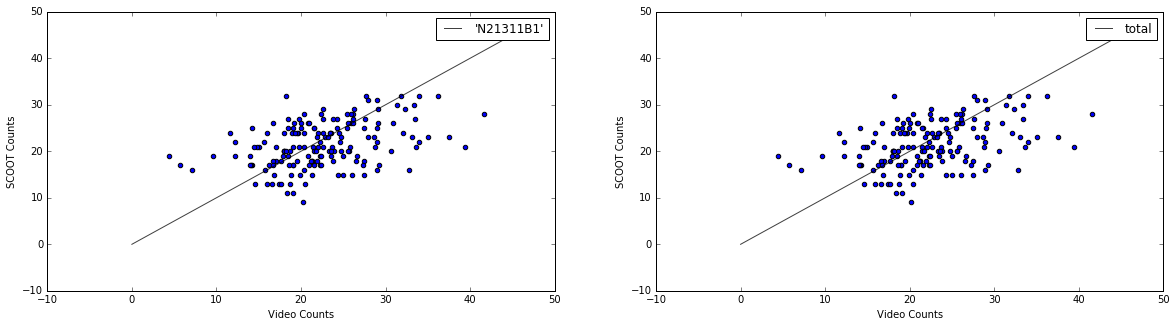

In [141]:
start_hour = 7
start_min = 0
start_sec = 0
end_hour = 11
end_min = 59
end_sec = 59

offsets = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(locations)):

    sdet = sdetectors[i]
    tcl = centrelines[i]
    dir_bin = dir_bins[i]
    offset = offsets[i]
    
    print(locations[i])
    print('Bins = SCOOT Cycles, Video Offset =', offset, 'sec')

    fig,axx = plt.subplots(figsize=[20,5]) 
    
    start_time_sec = start_hour * 3600 + start_min * 60 + start_sec
    end_time_sec = end_hour * 3600 + end_min * 60 + end_sec

    # Time and Location Filter
    s = scoot[(scoot['seconds']>=start_time_sec) & (scoot['seconds']+scoot['CycleTime']<=end_time_sec)].copy()
    r = video[(video['seconds']>=start_time_sec-offset) & (video['seconds']<=end_time_sec-offset) & (video['centreline_id']==tcl) & (video['dir_bin']==dir_bin)].copy()
    s = s[s['detector'].isin([x.strip('\'') for x in sdet])]
    
    # Aggregate individual detectors
    r = aggregate_lanes(r, aggregation[i])
    
    # Offset video 
    r['seconds']=r['seconds']+offset

    # Reset Index
    s.reset_index(inplace=True,drop=True)
    r.reset_index(inplace=True,drop=True)

    fig,(ax) = plt.subplots(1,len(sdet)+1,figsize=(20,5))
    # Plot Individual Detectors
    for det in range(len(sdet)):
        s0 = s[s['detector'] == sdet[det].strip('\'')]
        min_bins_start = list(s0['seconds'])
        min_bins_start.append(s0['seconds'].values[-1]+s0['CycleTime'].values[-1])

        v = aggregate_data(min_bins_start,r,'detector'+str(det))
        axx.plot([x/3600 for x in min_bins_start[:-1]],v,colors[det]+'--',label='Video Counts - ' + sdet[det])
        axx.plot([x/3600 for x in min_bins_start[:-1]],s0['Volume'],colors[det],label='SCOOT Disagg - '+ sdet[det])

        ax[det].scatter(v,s0['Volume'],label=None)
        ax[det].set_xlabel('Video Counts')
        ax[det].set_ylabel('SCOOT Counts')
        add_y_eq_x(ax[det], sdet[det])
        ax[det].legend()
        
    # Plot Total
    s = s.groupby(['seconds'], as_index=False).sum()
    min_bins_start = list(s['seconds'])
    min_bins_start.append(s['seconds'].values[-1]+s['CycleTime'].values[-1])
    v = aggregate_data(min_bins_start,r,'Volume')
    det = det + 1
    axx.plot([x/3600 for x in min_bins_start[:-1]],v,colors[-1]+'--',label='Video Counts - total',linewidth=3)
    axx.plot([x/3600 for x in min_bins_start[:-1]],s['Volume'],colors[-1],label='SCOOT Disagg - total',linewidth=3)

    ax[det].scatter(v,s['Volume'],label=None)
    ax[det].set_xlabel('Video Counts')
    ax[det].set_ylabel('SCOOT Counts')
    add_y_eq_x(ax[det], 'total')
    ax[det].legend()
    
    axx.legend()
    axx.set_ylabel('Volume (veh)')
    axx.set_xlabel('Hour')
    plt.show()


Don Mills NB N of Overlea
binsize = 60 seconds, Video Offset = 0 sec


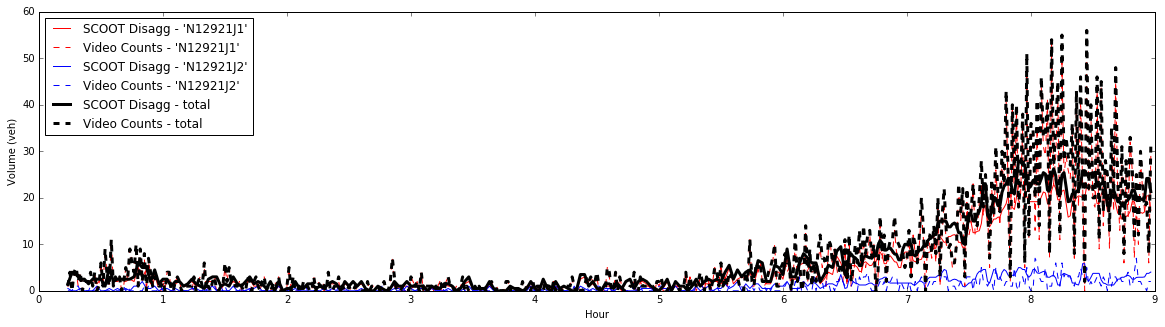

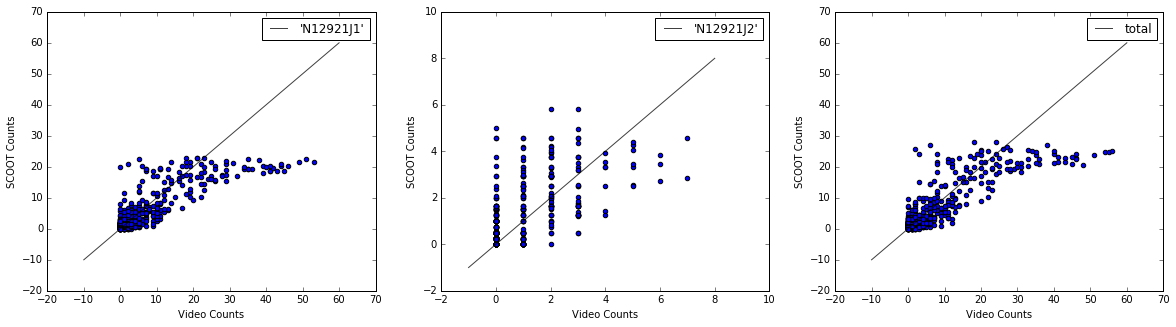

binsize = 180 seconds, Video Offset = 0 sec


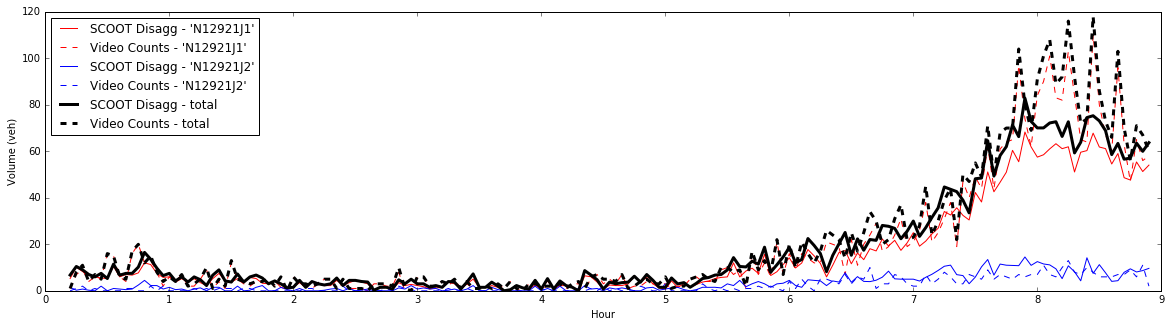

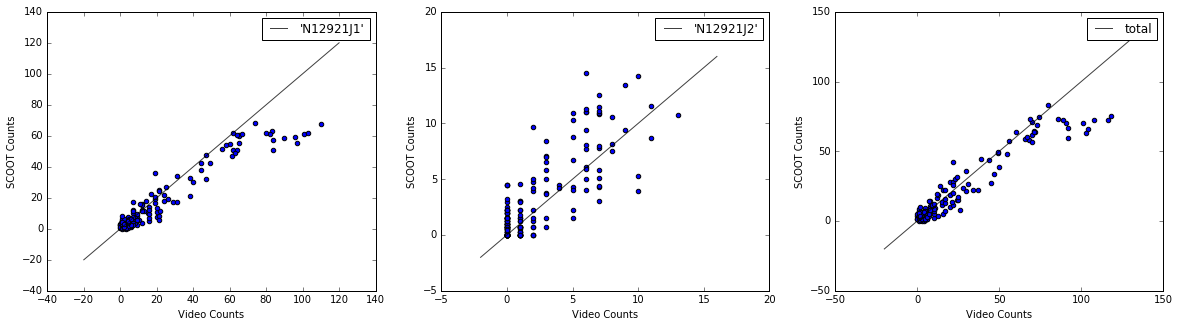

binsize = 300 seconds, Video Offset = 0 sec


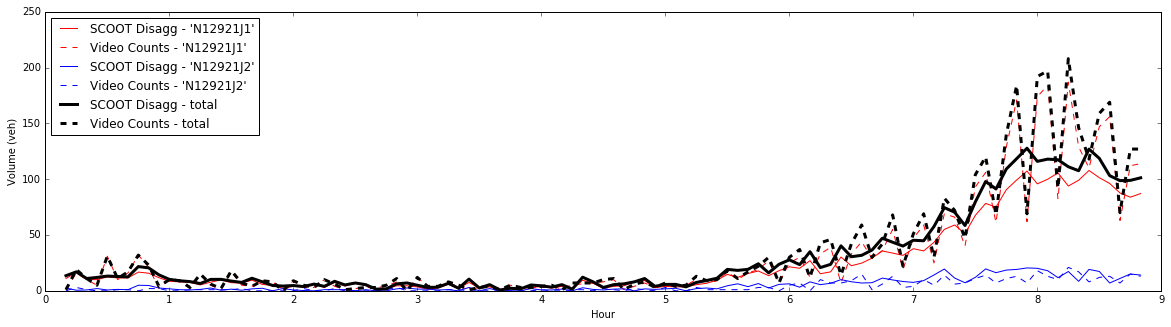

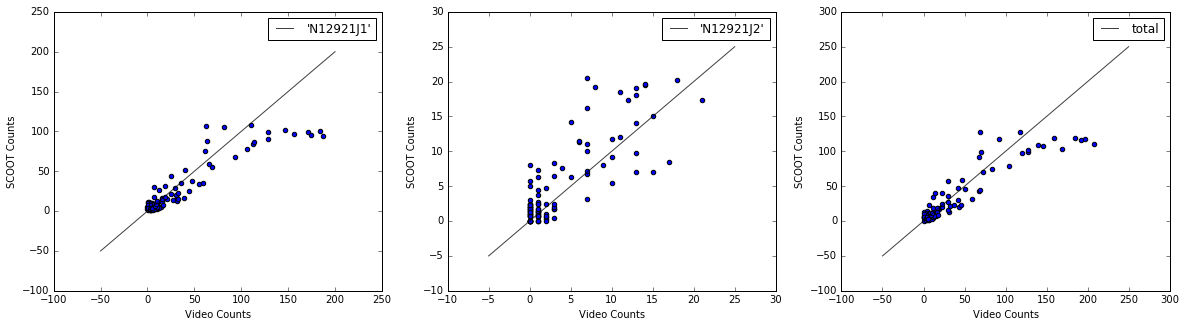

binsize = 900 seconds, Video Offset = 0 sec


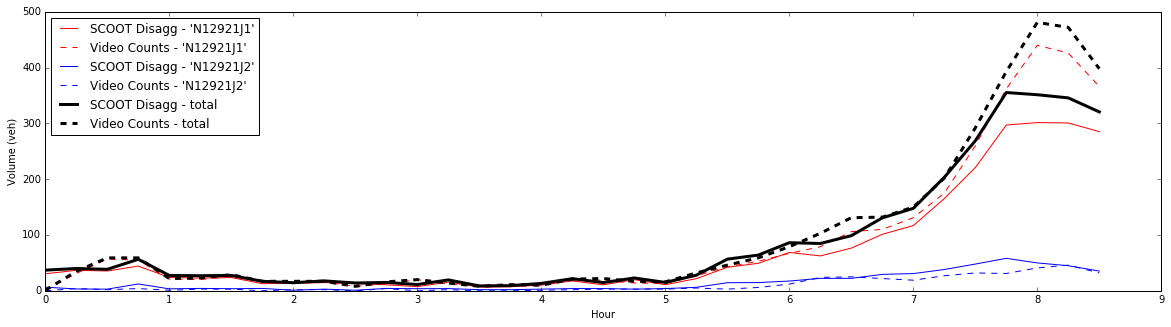

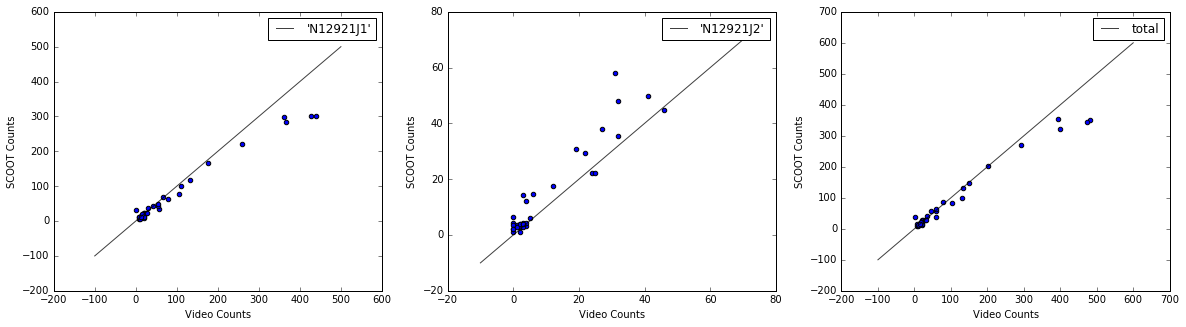

Don Mills SB S of Gateway
binsize = 60 seconds, Video Offset = 0 sec


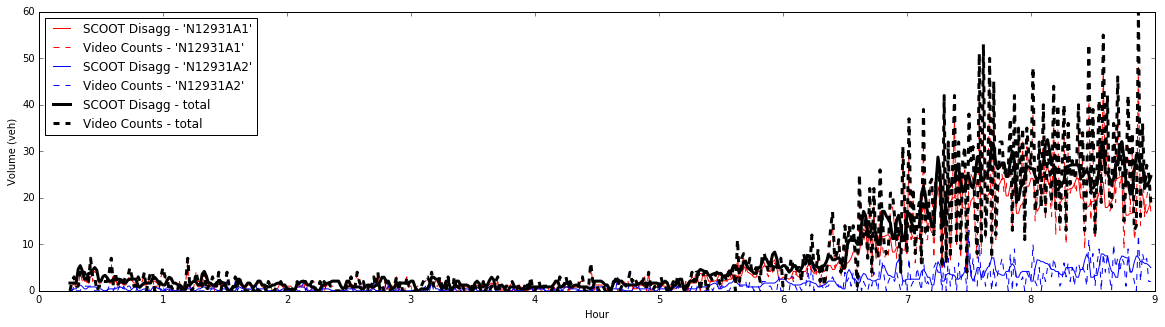

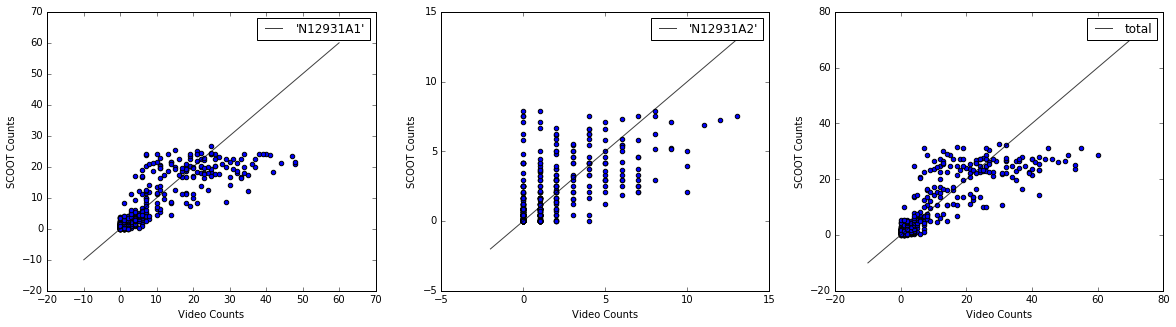

binsize = 180 seconds, Video Offset = 0 sec


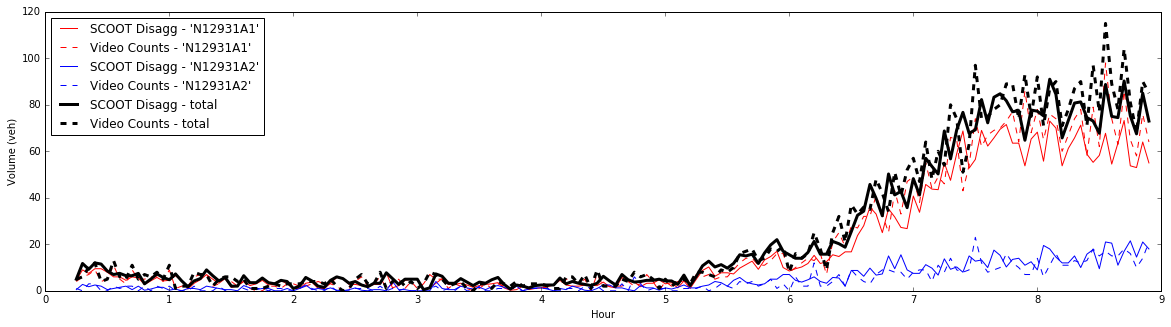

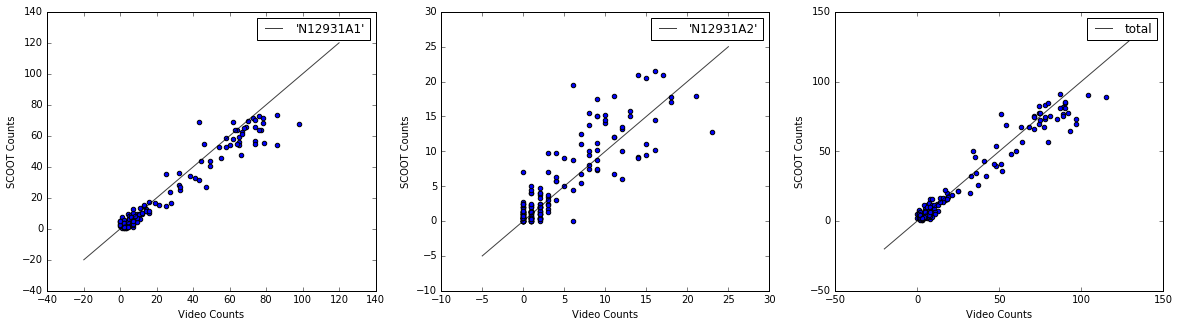

binsize = 300 seconds, Video Offset = 0 sec


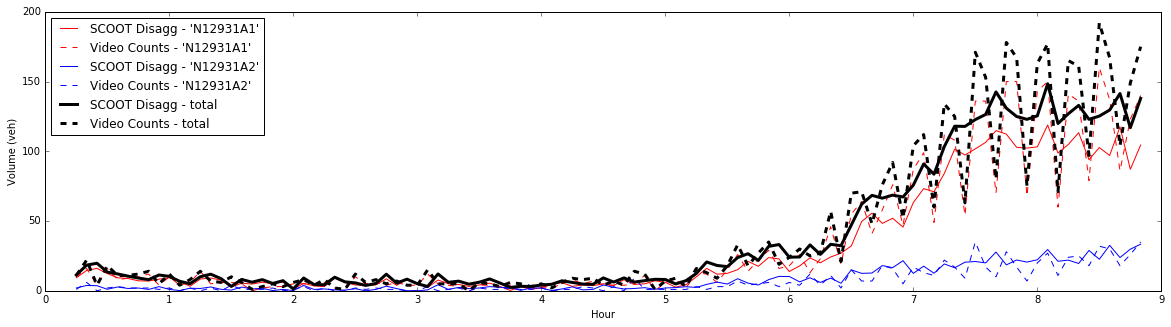

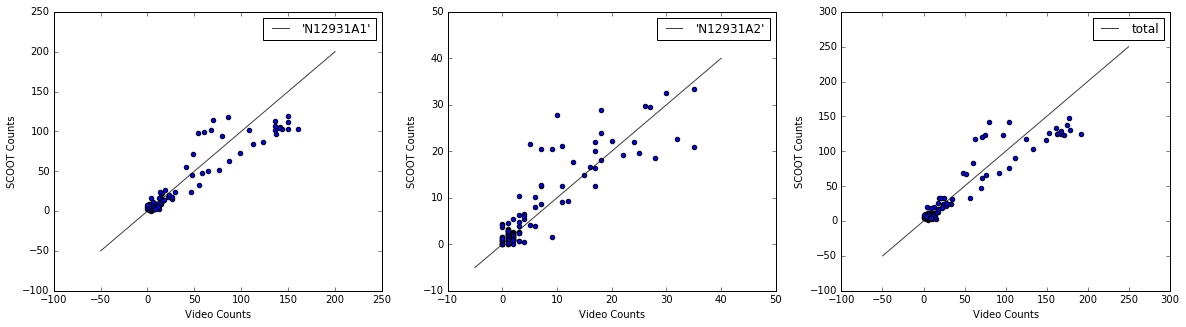

binsize = 900 seconds, Video Offset = 0 sec


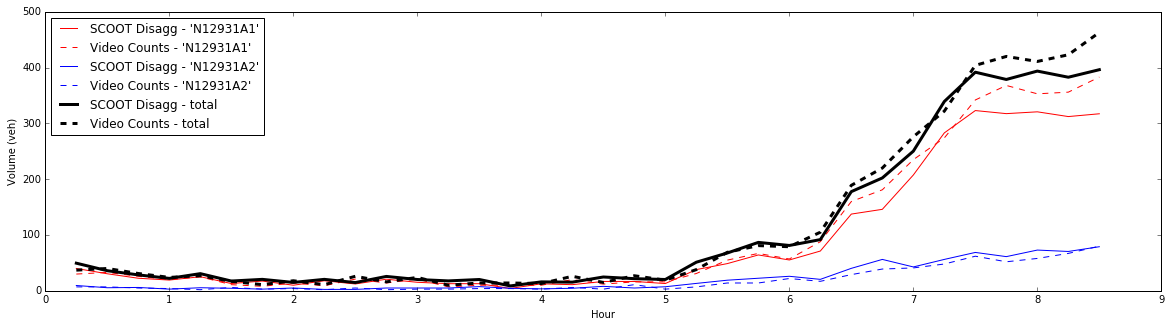

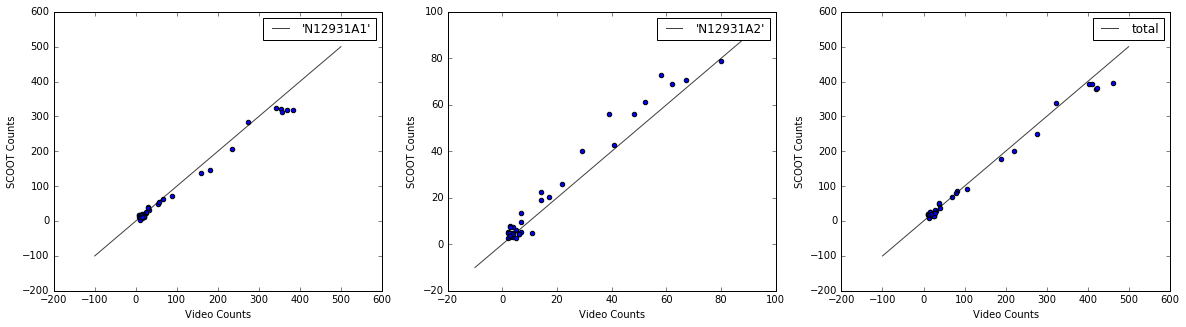

Don Mills NB N of Clock Tower
binsize = 60 seconds, Video Offset = 0 sec


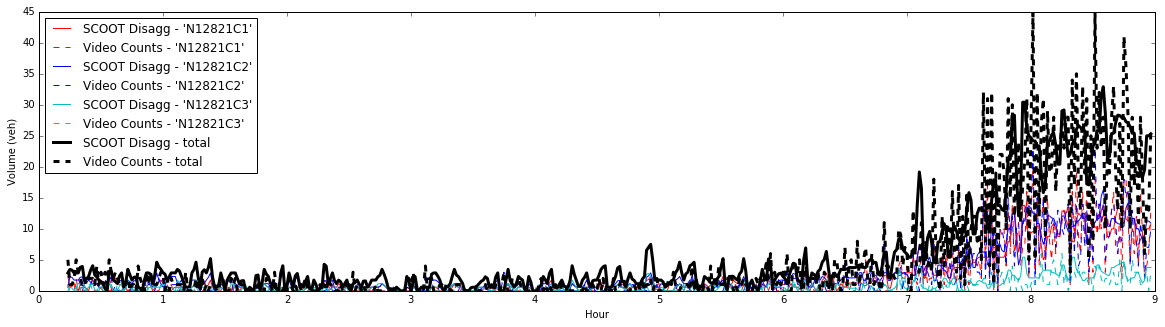

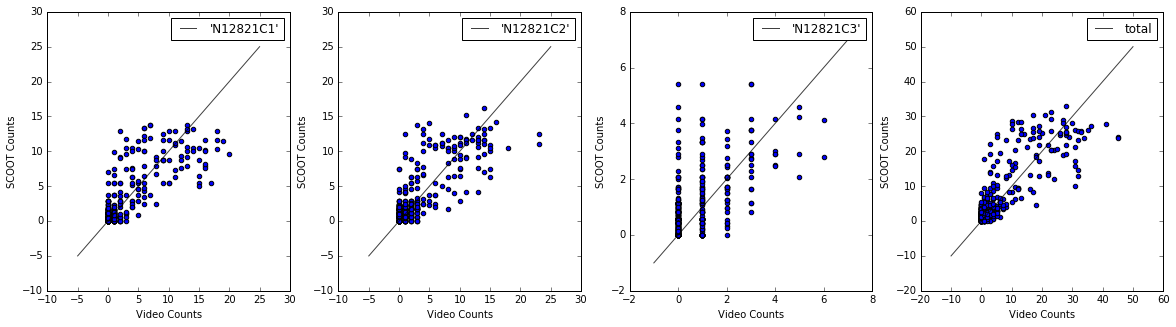

binsize = 180 seconds, Video Offset = 0 sec


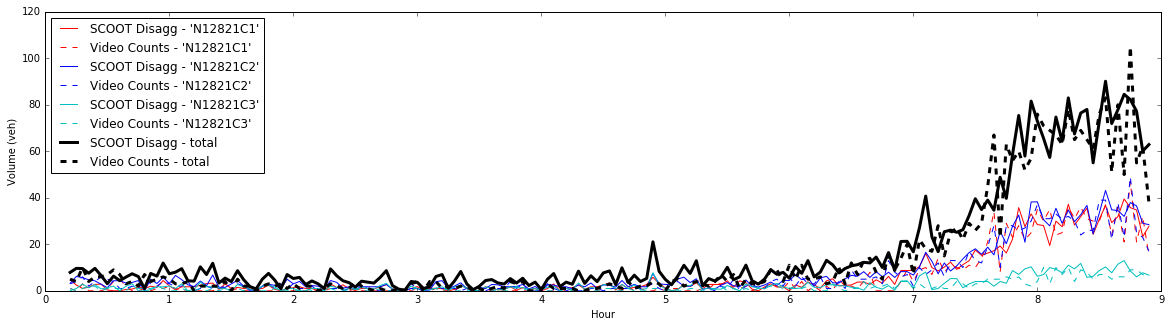

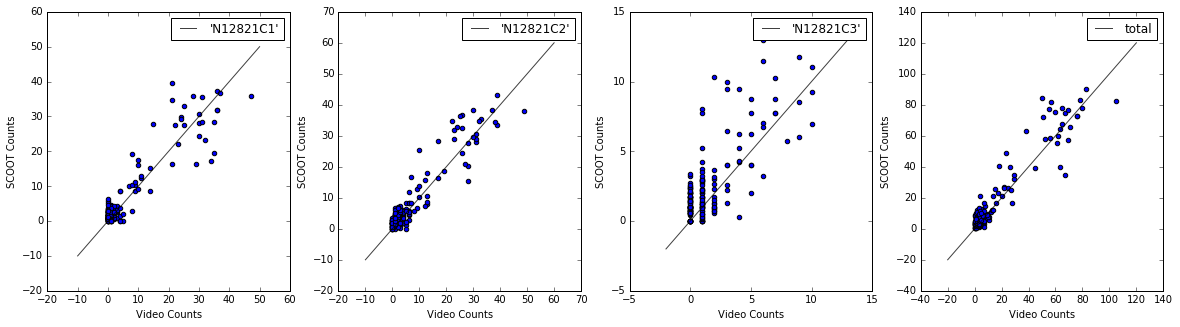

binsize = 300 seconds, Video Offset = 0 sec


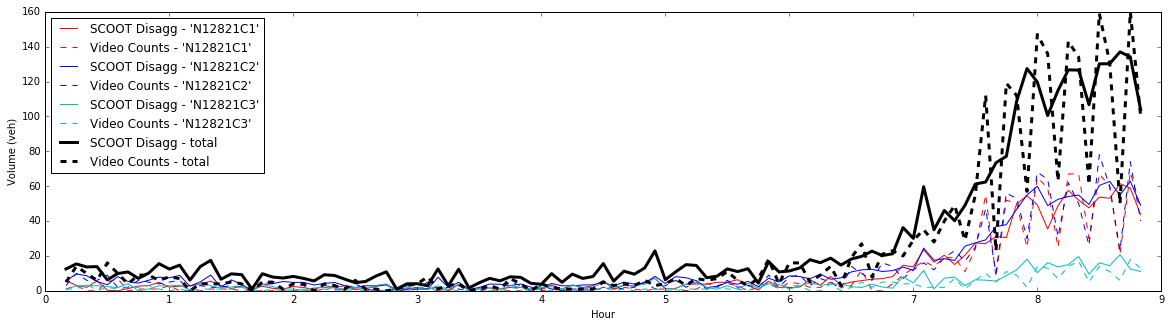

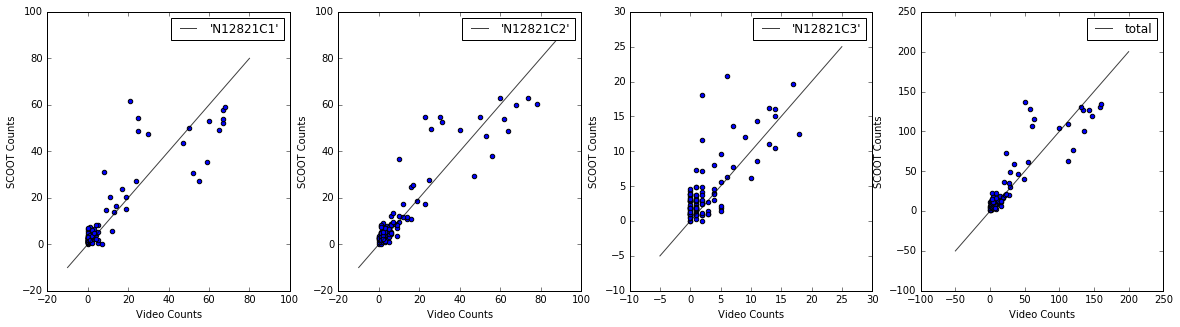

binsize = 900 seconds, Video Offset = 0 sec


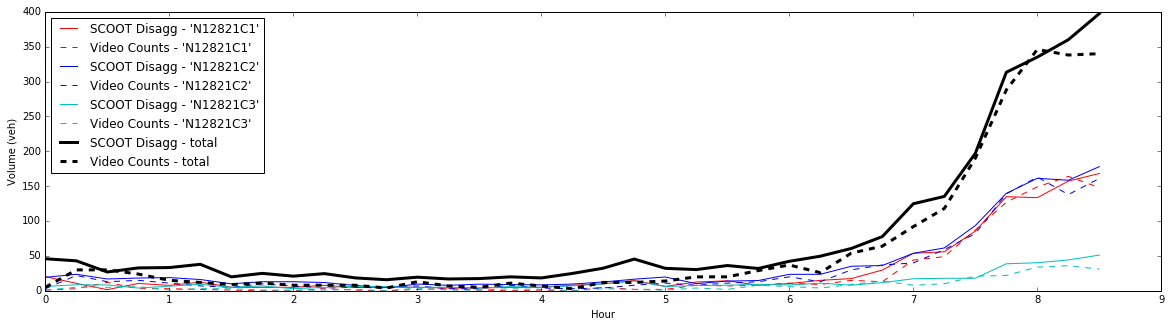

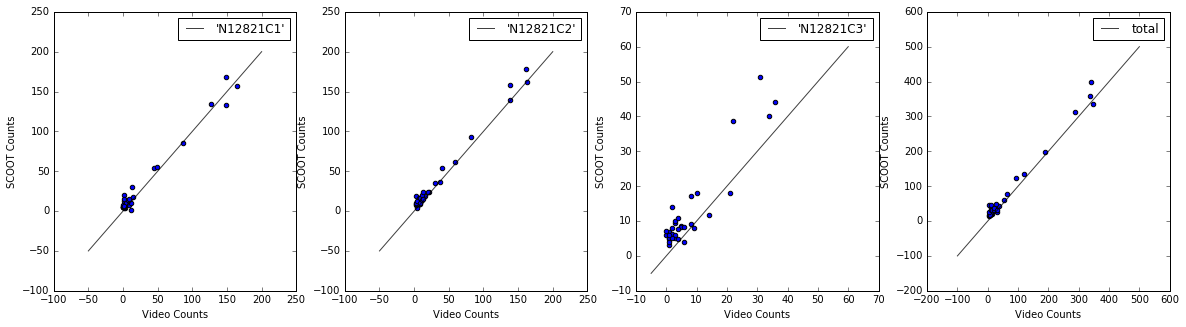

Don Mills SB S of Lawrence
binsize = 60 seconds, Video Offset = 0 sec


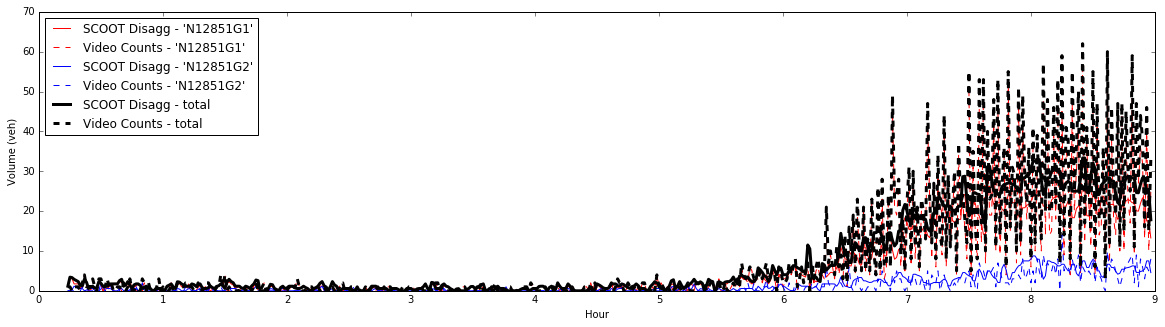

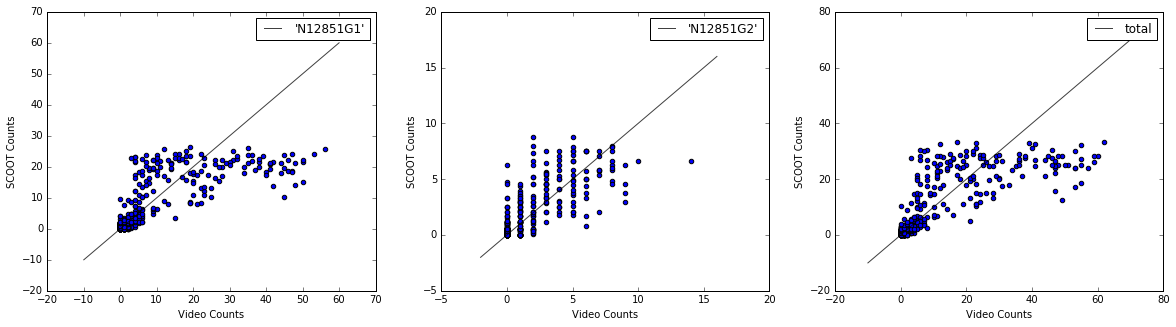

binsize = 180 seconds, Video Offset = 0 sec


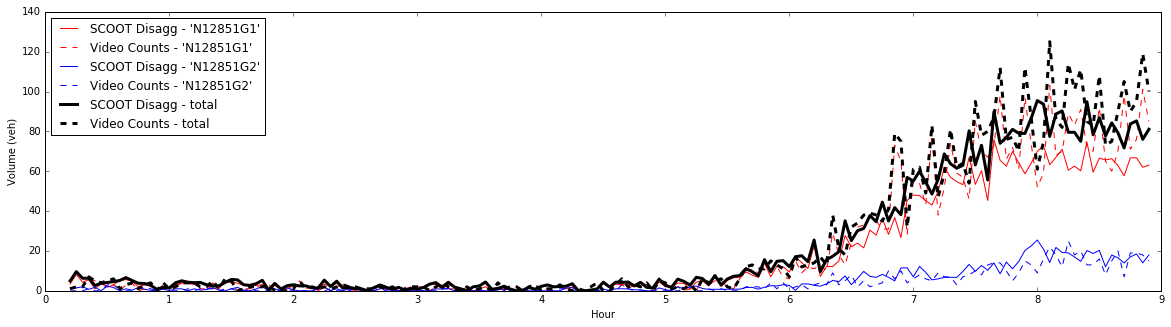

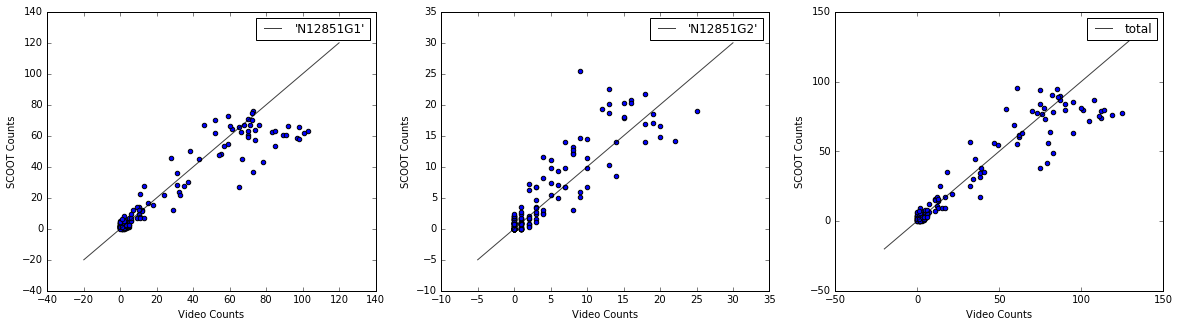

binsize = 300 seconds, Video Offset = 0 sec


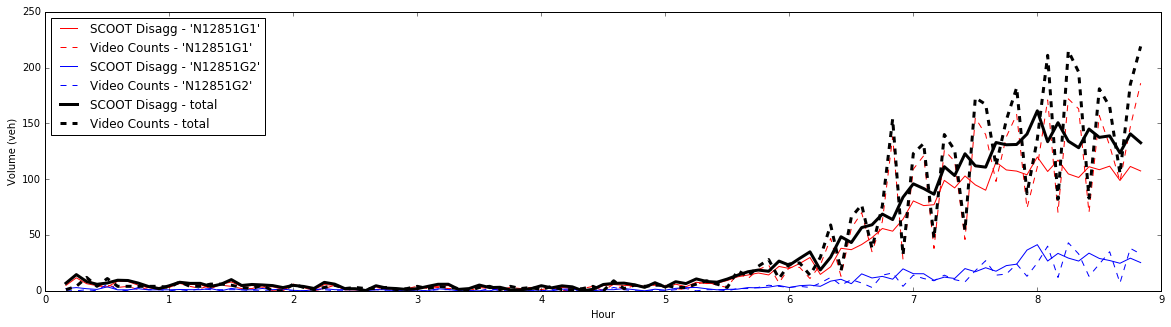

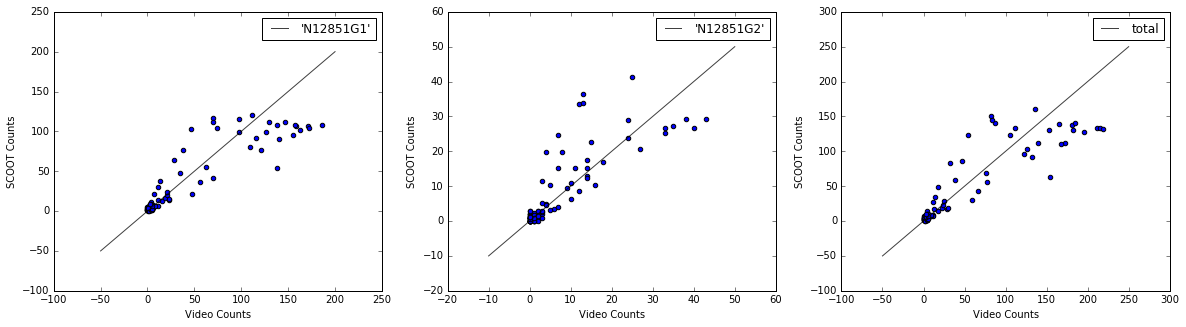

binsize = 900 seconds, Video Offset = 0 sec


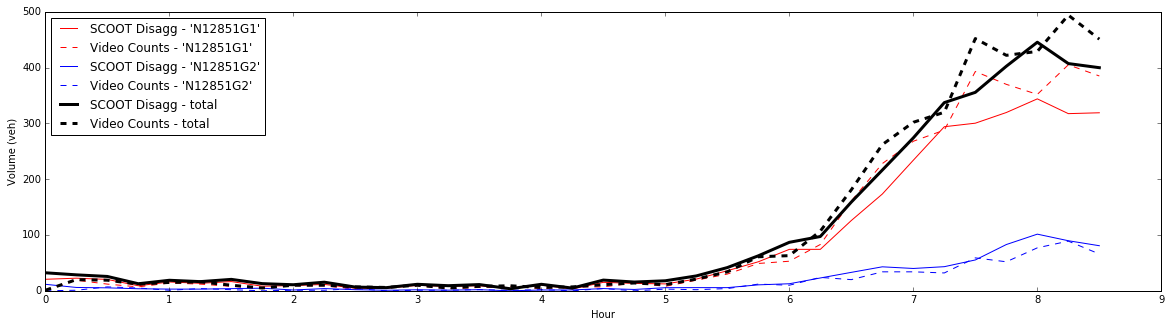

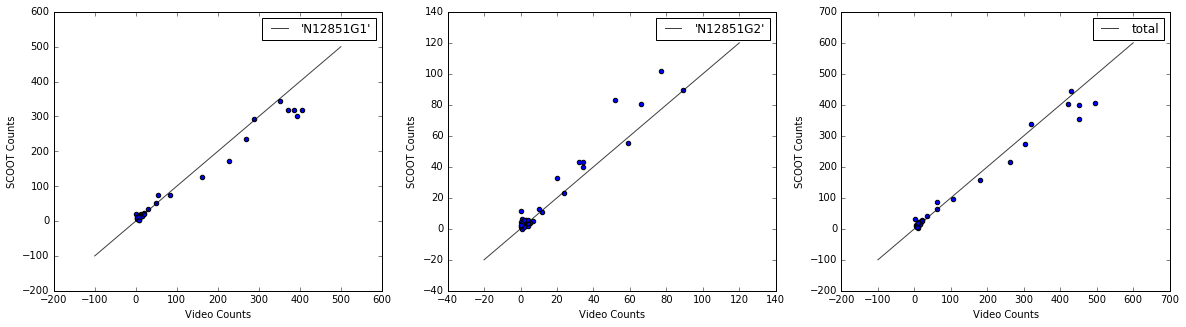

Lake Shore EB E of Stadium
binsize = 60 seconds, Video Offset = 0 sec


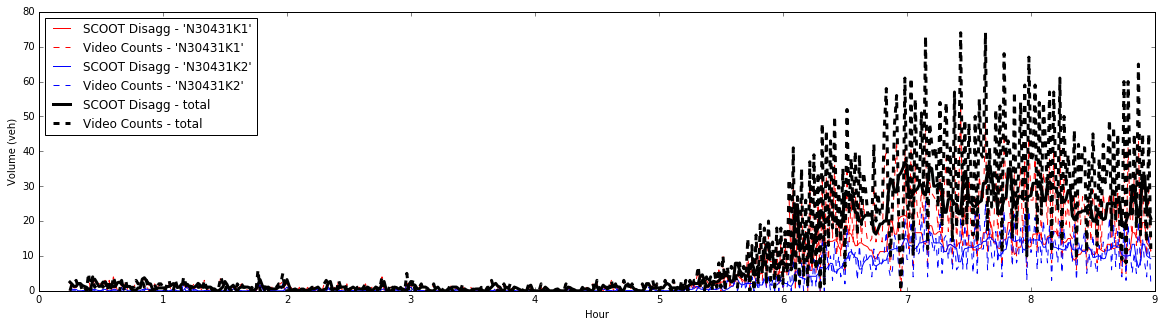

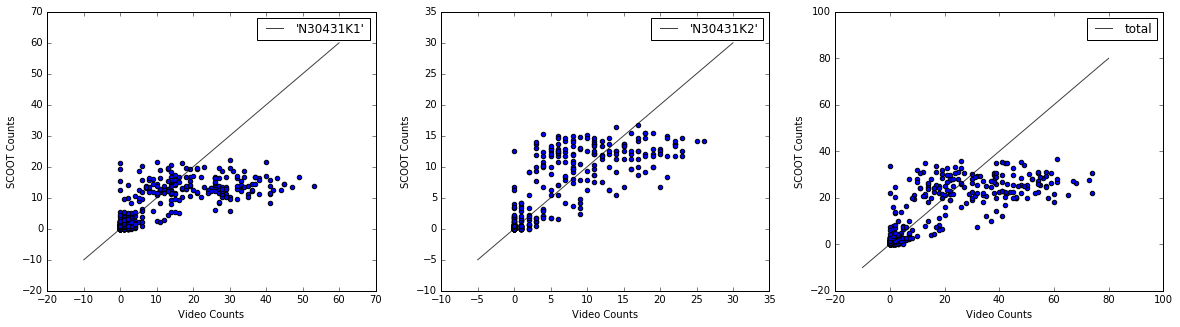

binsize = 180 seconds, Video Offset = 0 sec


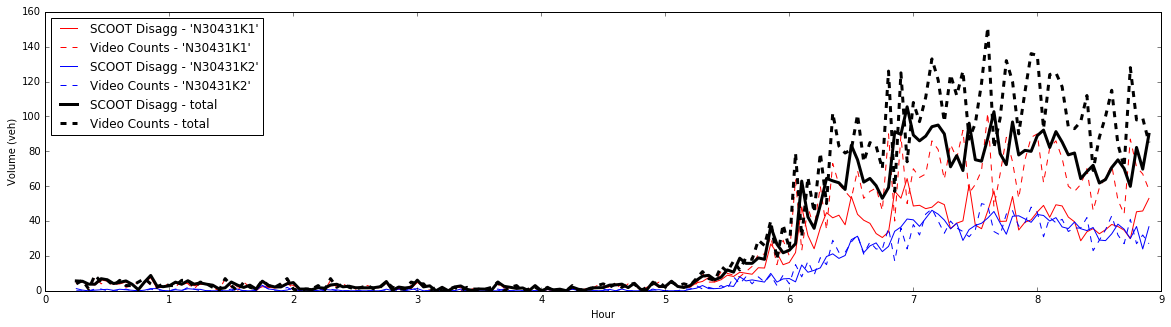

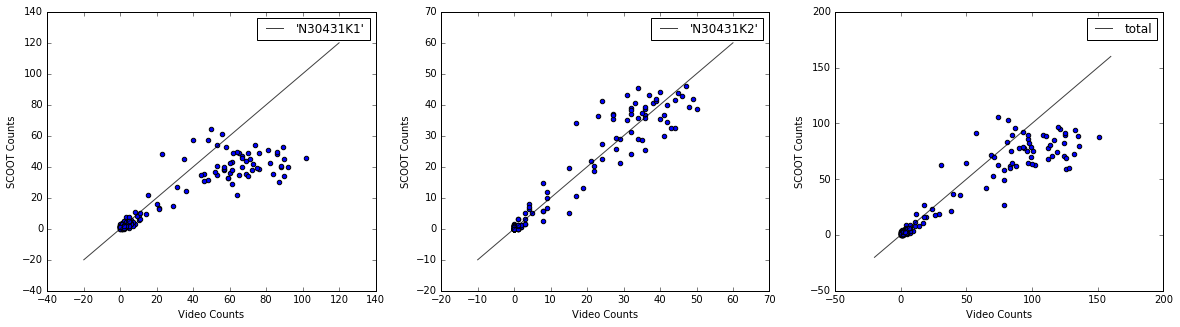

binsize = 300 seconds, Video Offset = 0 sec


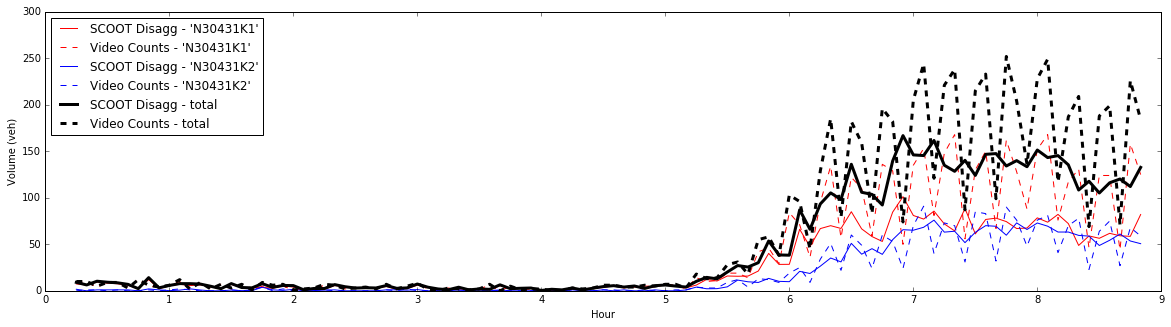

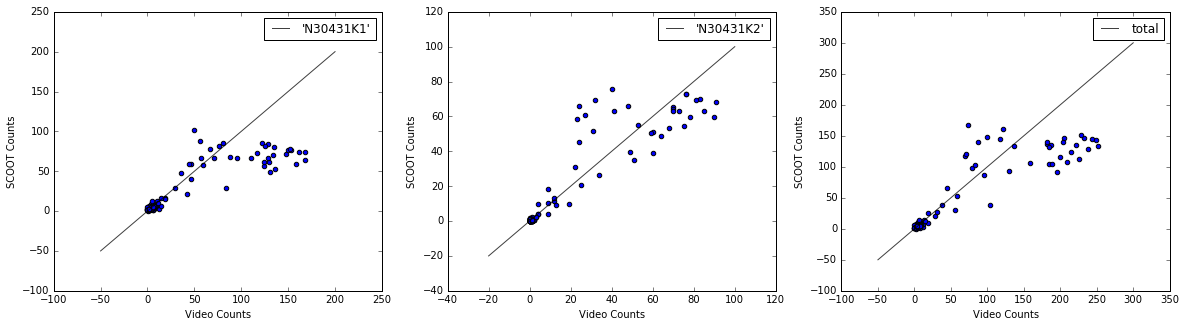

binsize = 900 seconds, Video Offset = 0 sec


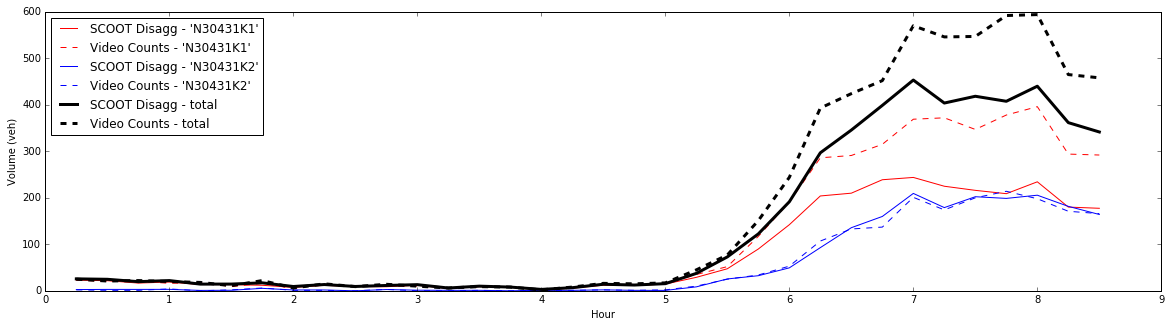

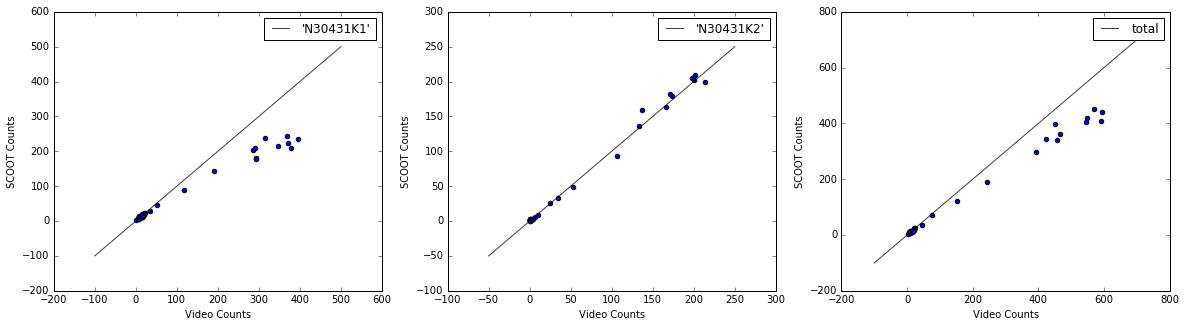

Lake Shore WB W of Bathurst
binsize = 60 seconds, Video Offset = 0 sec


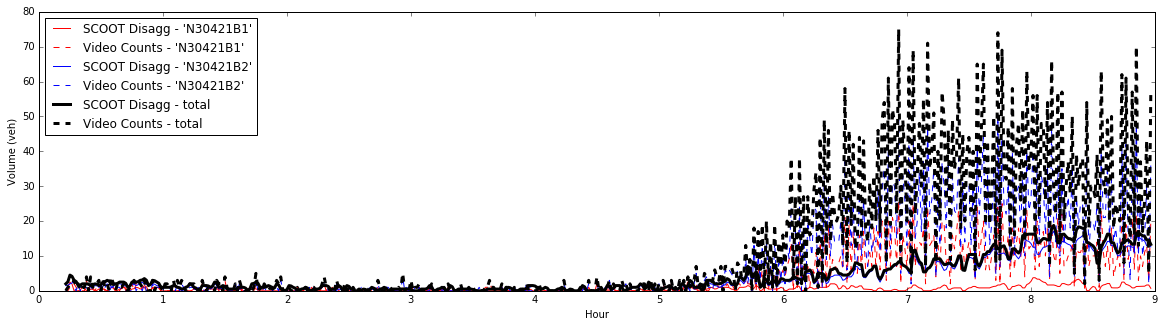

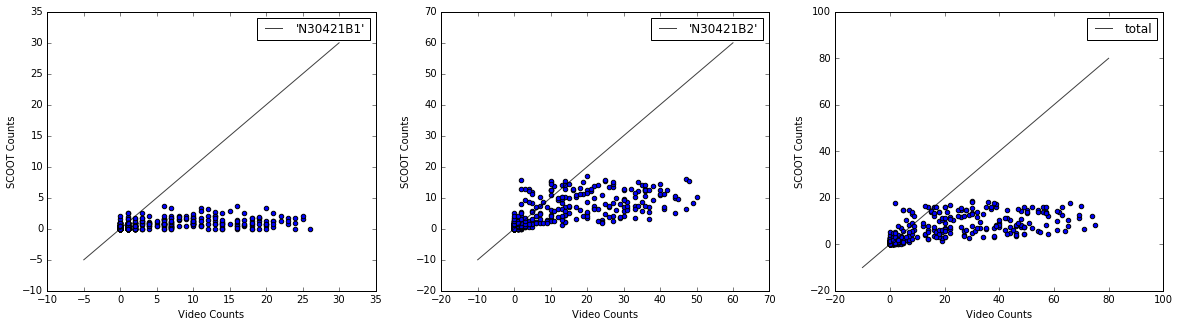

binsize = 180 seconds, Video Offset = 0 sec


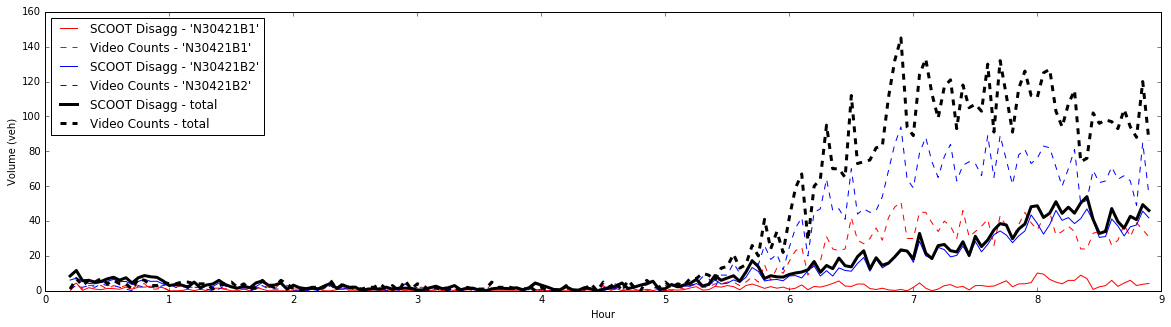

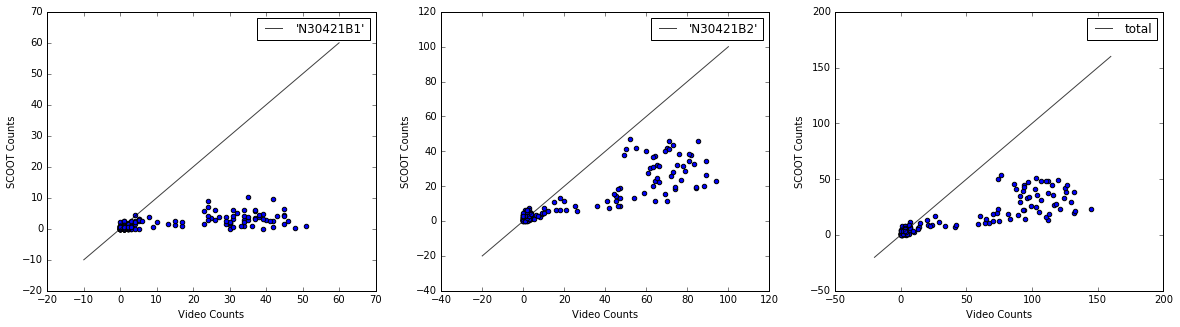

binsize = 300 seconds, Video Offset = 0 sec


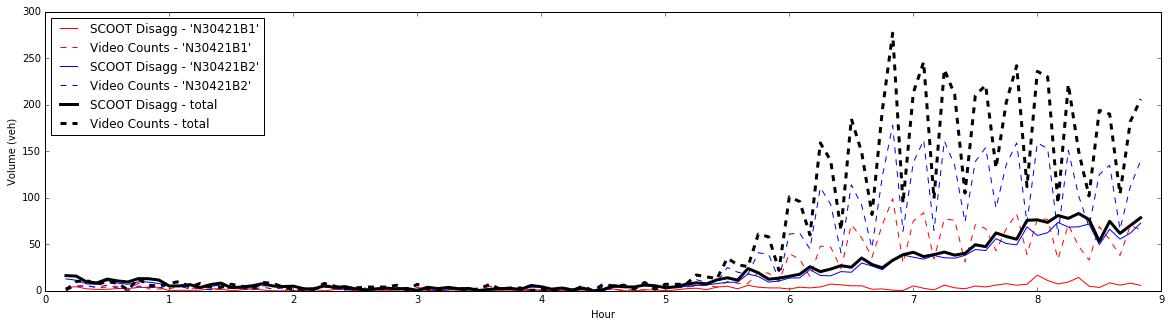

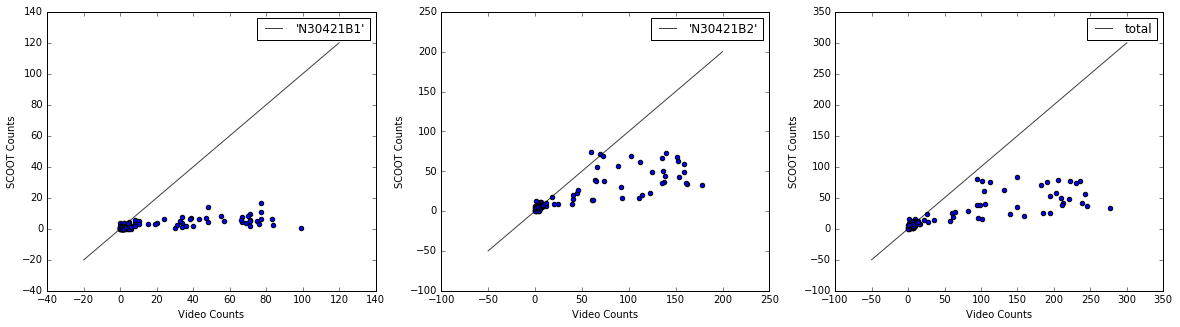

binsize = 900 seconds, Video Offset = 0 sec


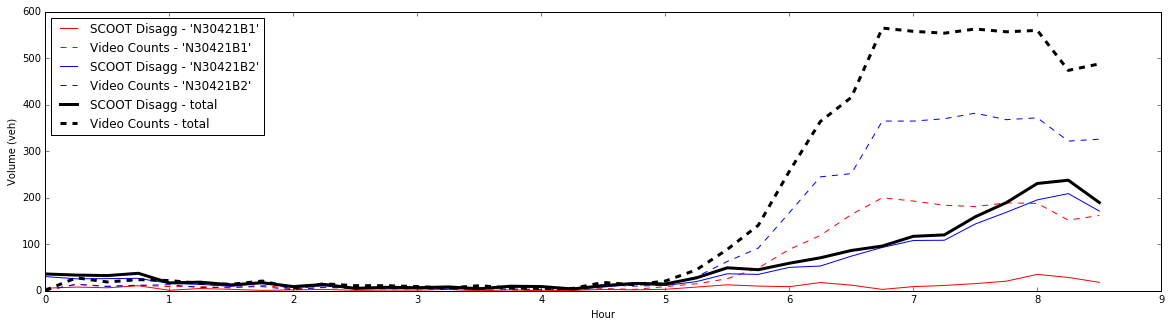

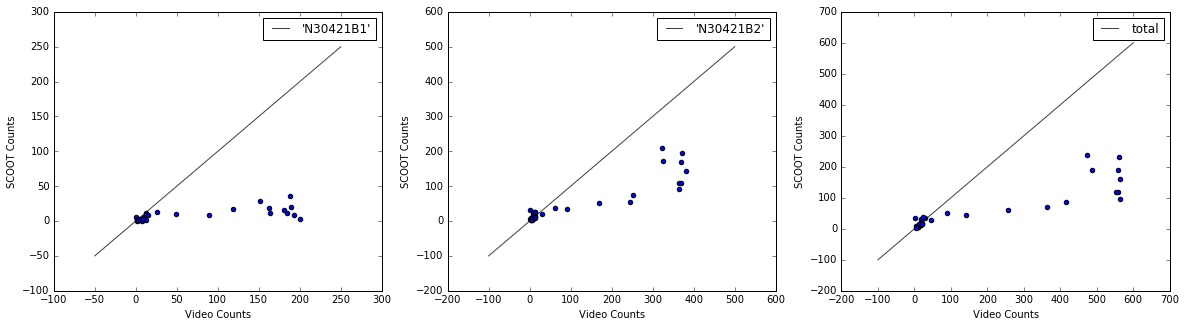

Lake Shore EB E of Spadina
binsize = 60 seconds, Video Offset = 0 sec


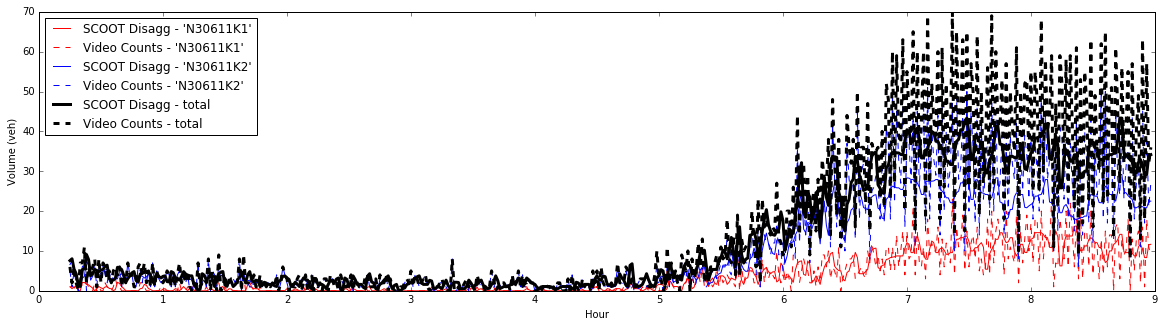

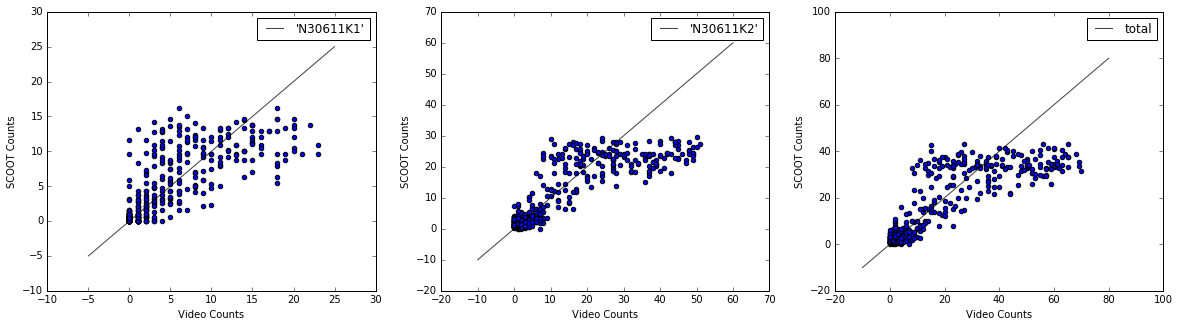

binsize = 180 seconds, Video Offset = 0 sec


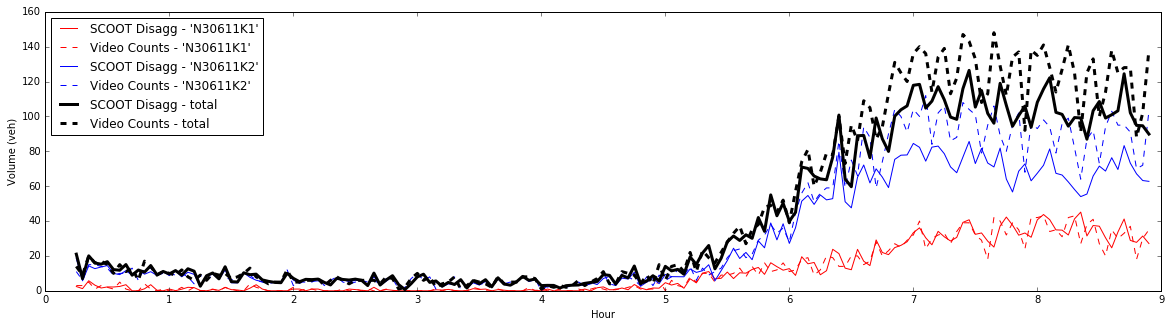

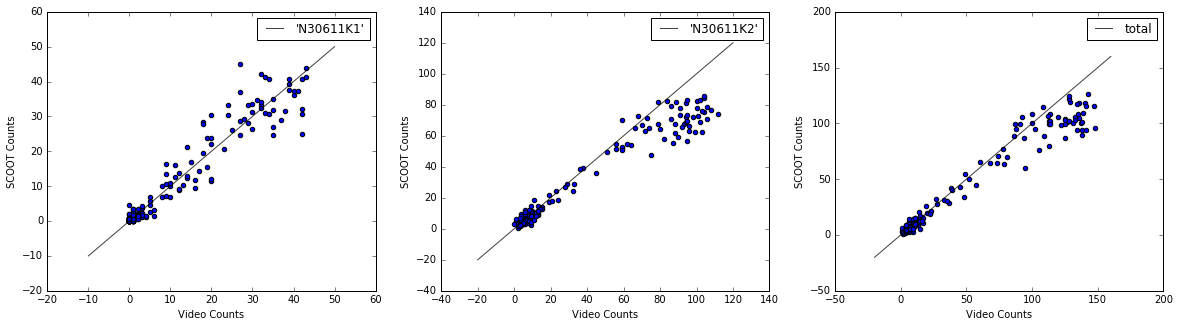

binsize = 300 seconds, Video Offset = 0 sec


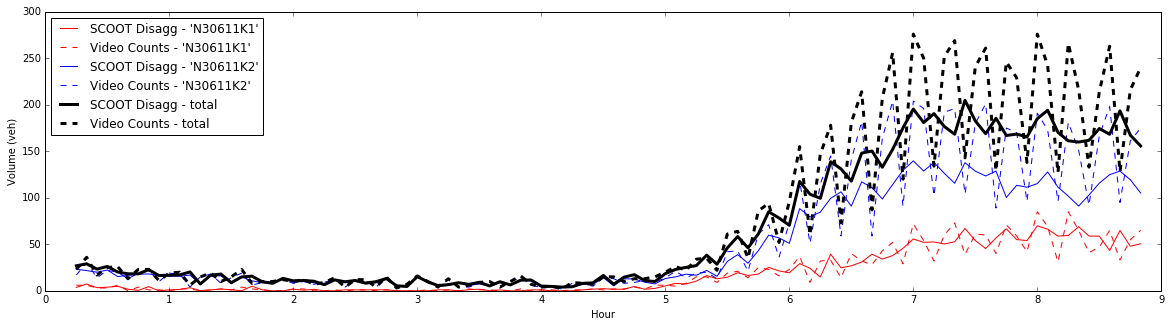

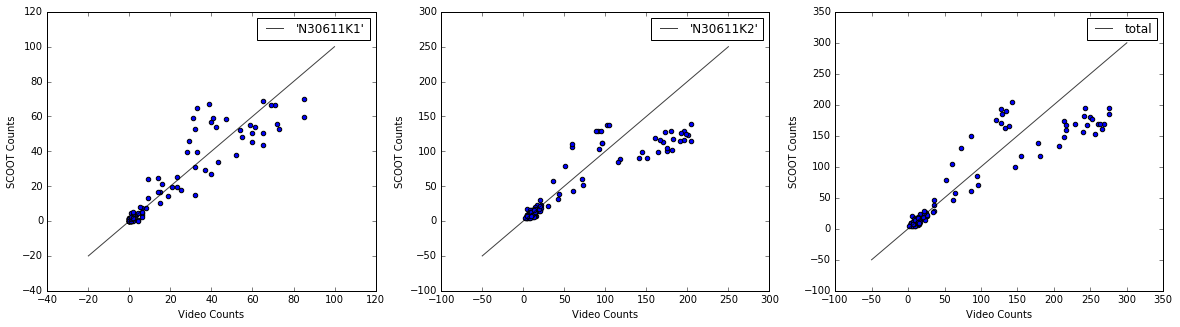

binsize = 900 seconds, Video Offset = 0 sec


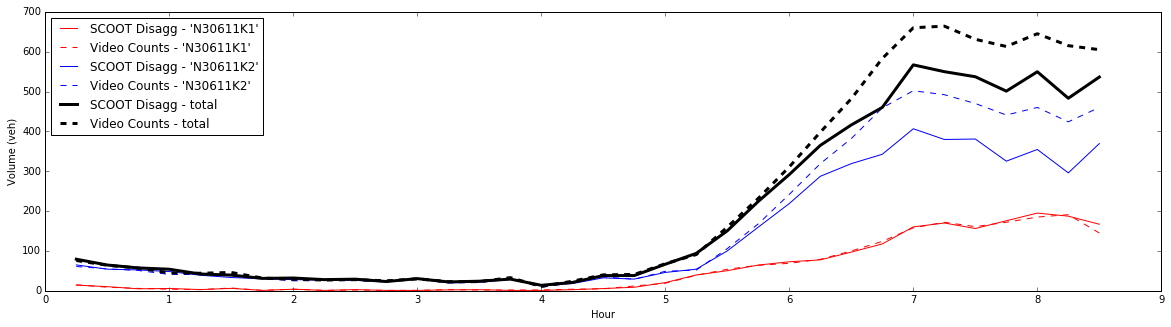

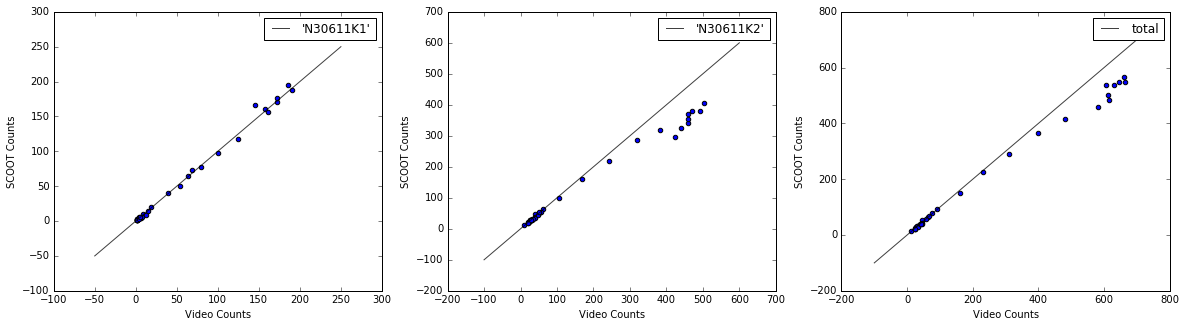

Lake Shore EB E of Ontario Place
binsize = 60 seconds, Video Offset = 0 sec


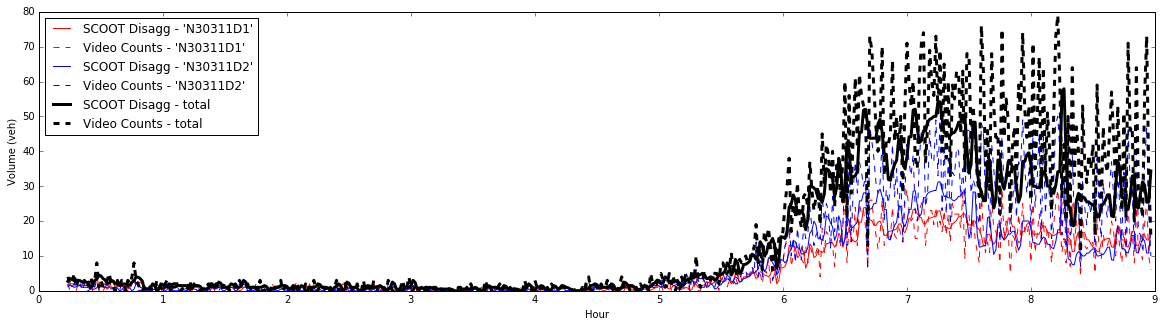

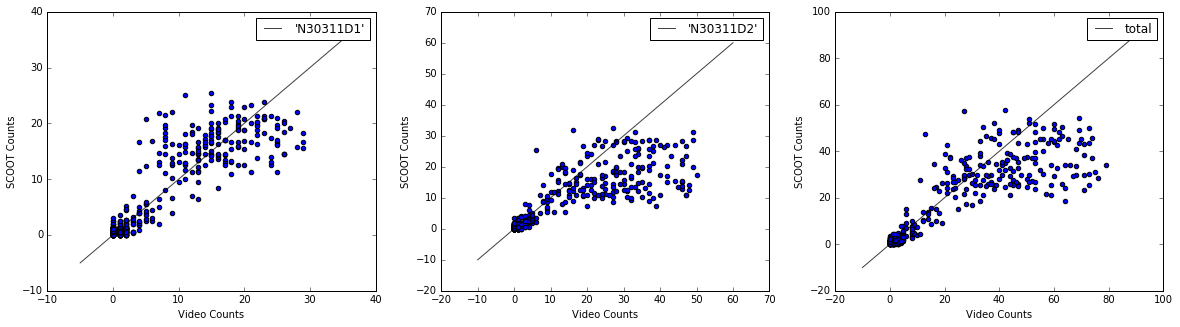

binsize = 180 seconds, Video Offset = 0 sec


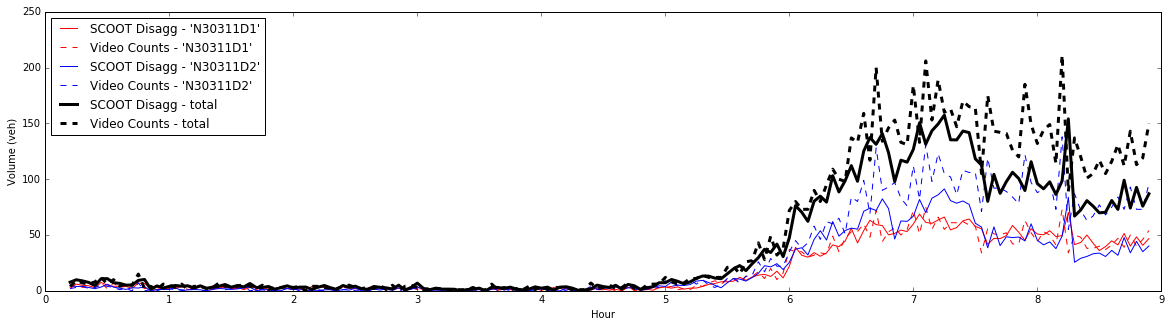

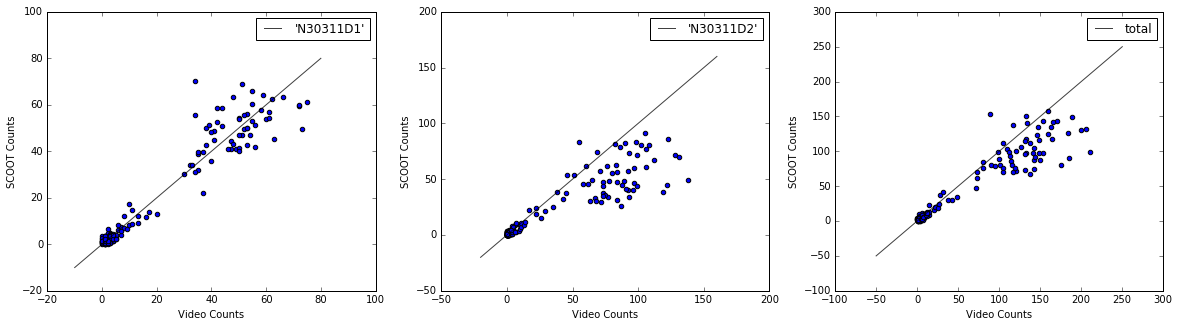

binsize = 300 seconds, Video Offset = 0 sec


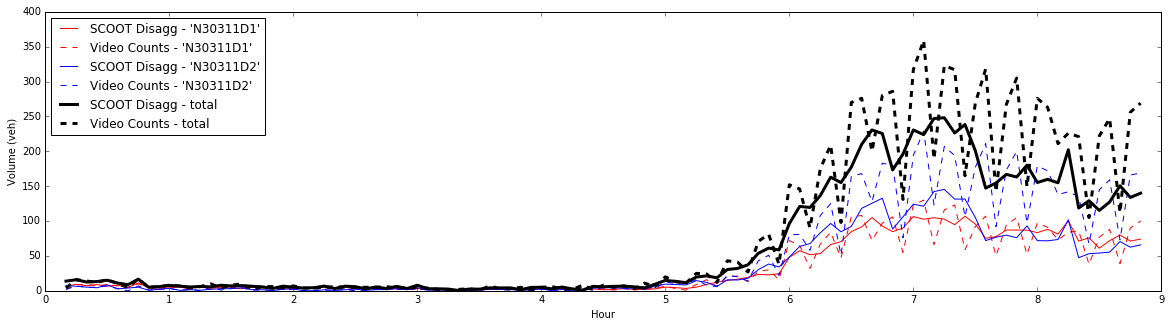

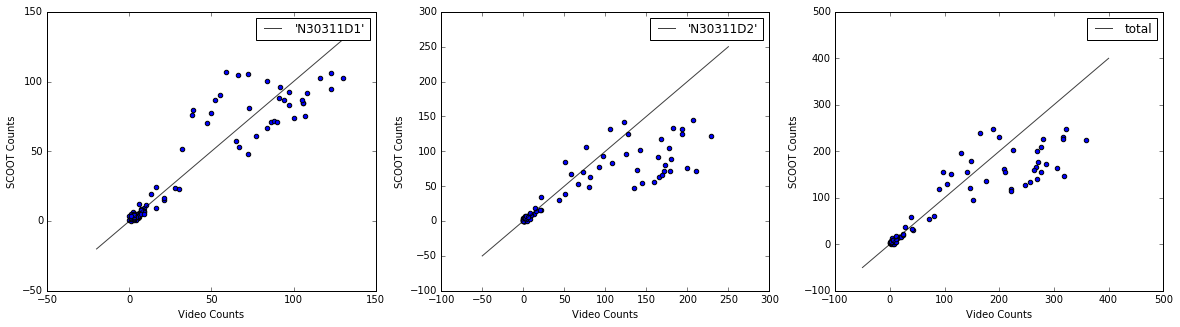

binsize = 900 seconds, Video Offset = 0 sec


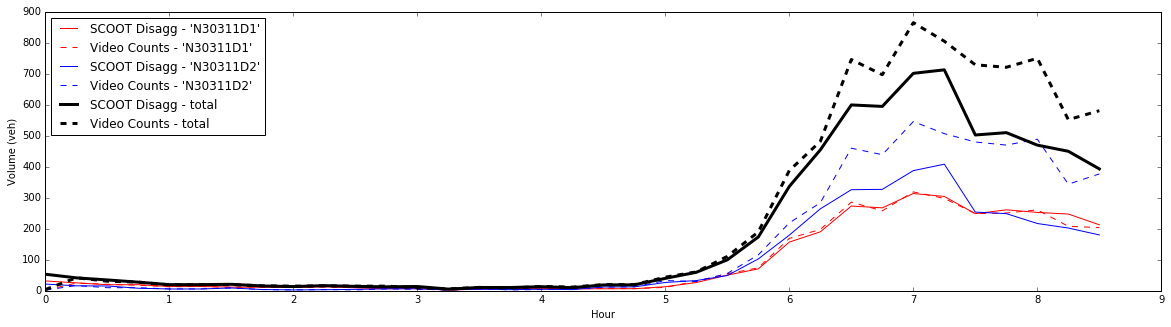

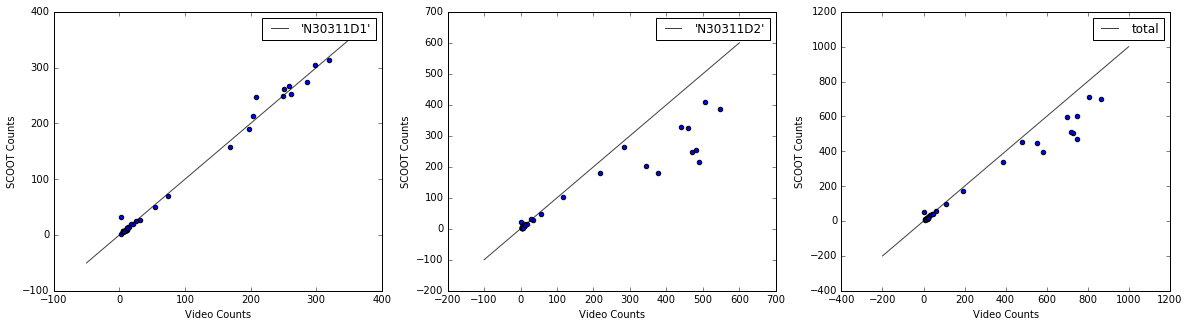

Bloor EB W of Castle Frank
binsize = 60 seconds, Video Offset = 0 sec


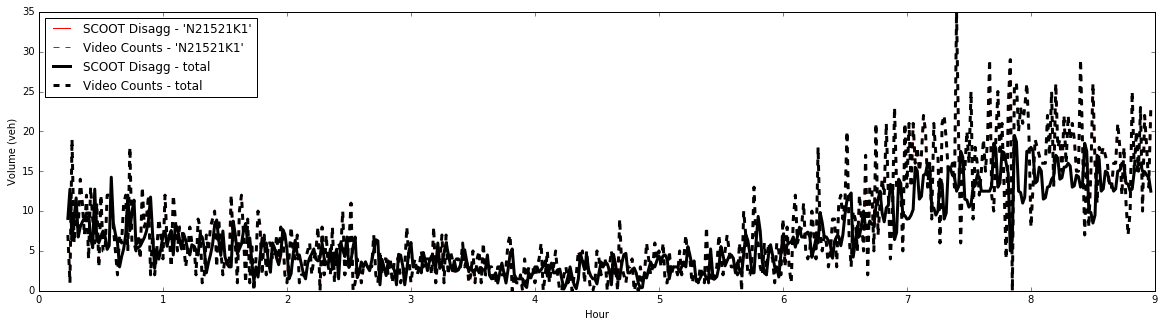

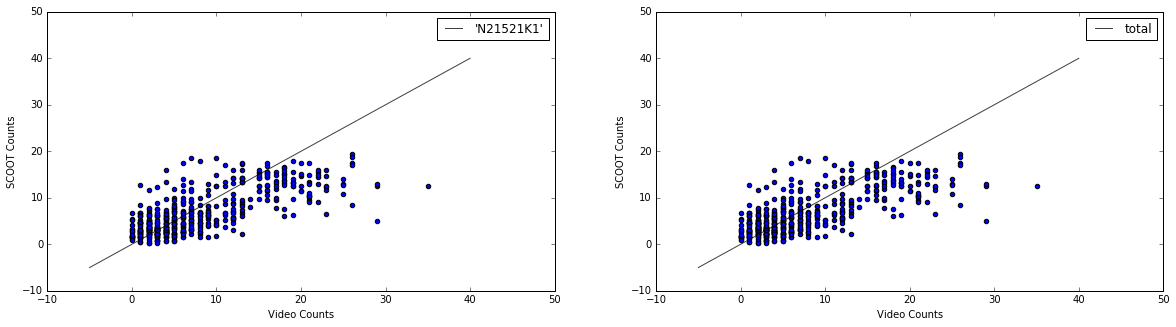

binsize = 180 seconds, Video Offset = 0 sec


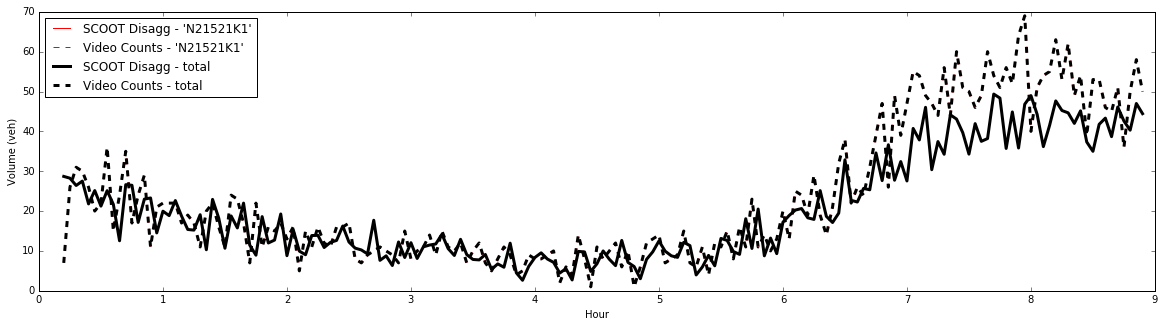

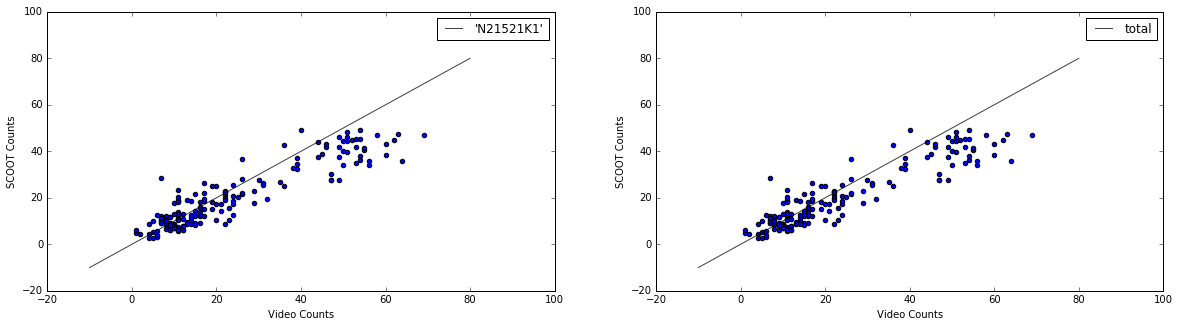

binsize = 300 seconds, Video Offset = 0 sec


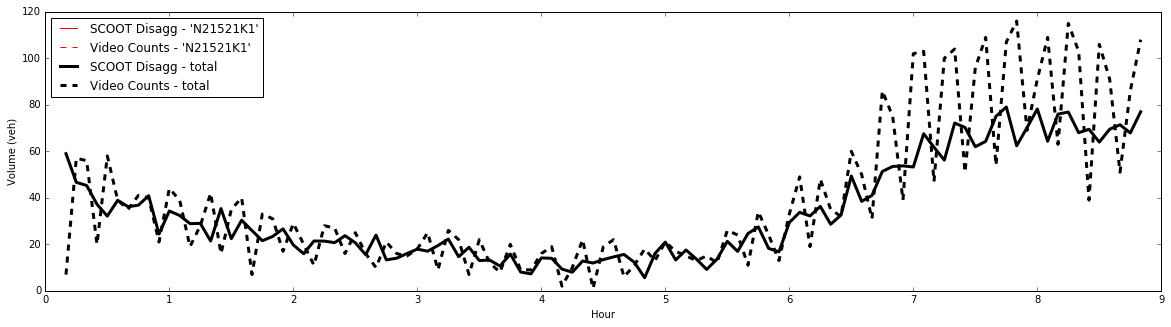

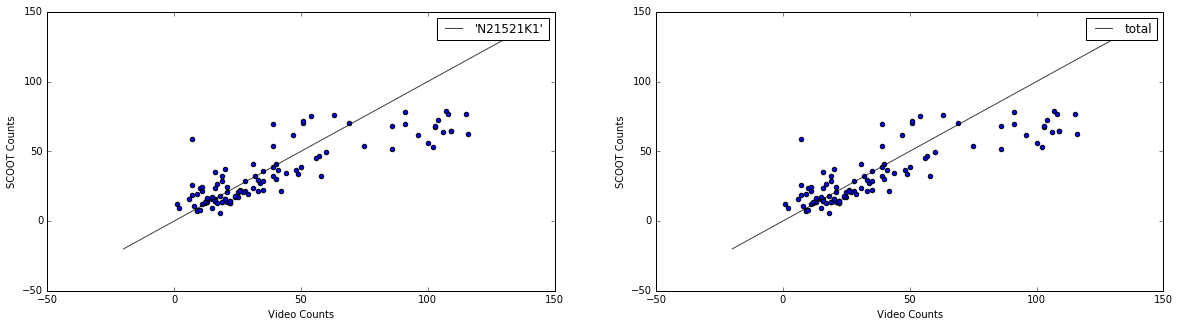

binsize = 900 seconds, Video Offset = 0 sec


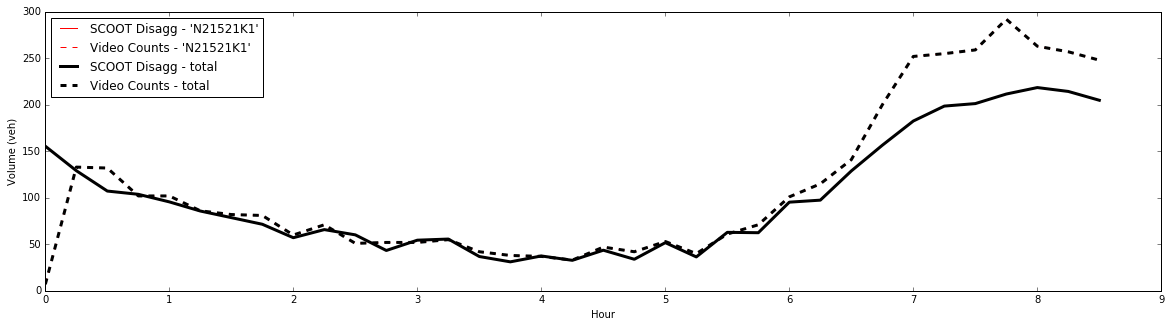

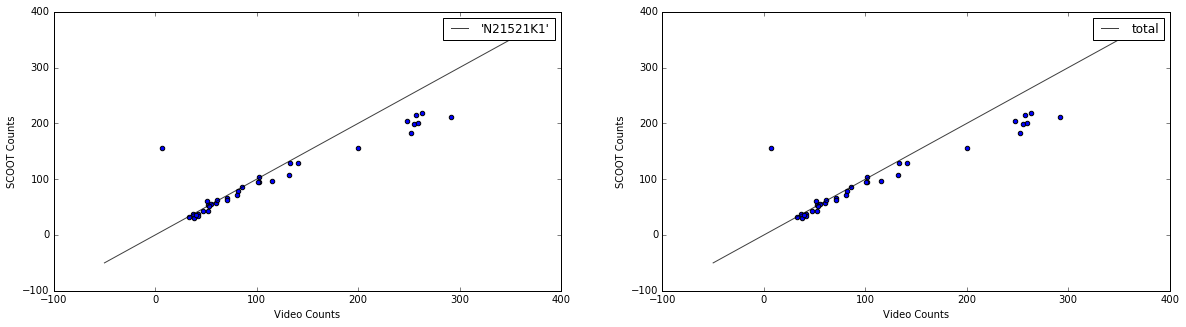

Bloor WB E of Castle Frank
binsize = 60 seconds, Video Offset = 0 sec


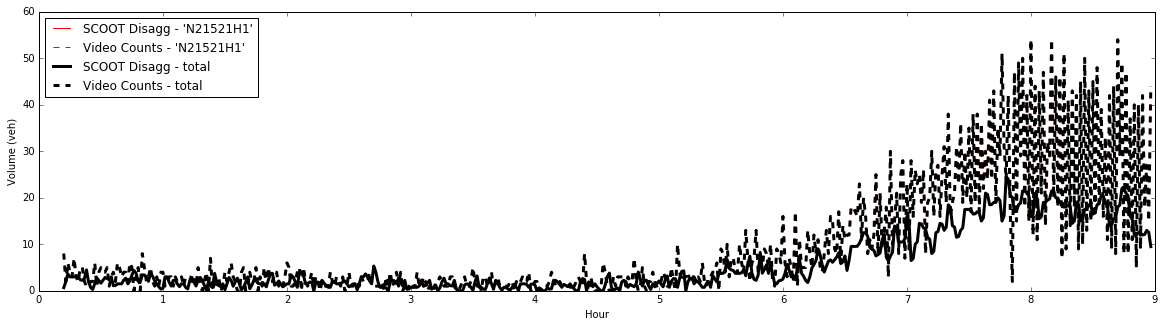

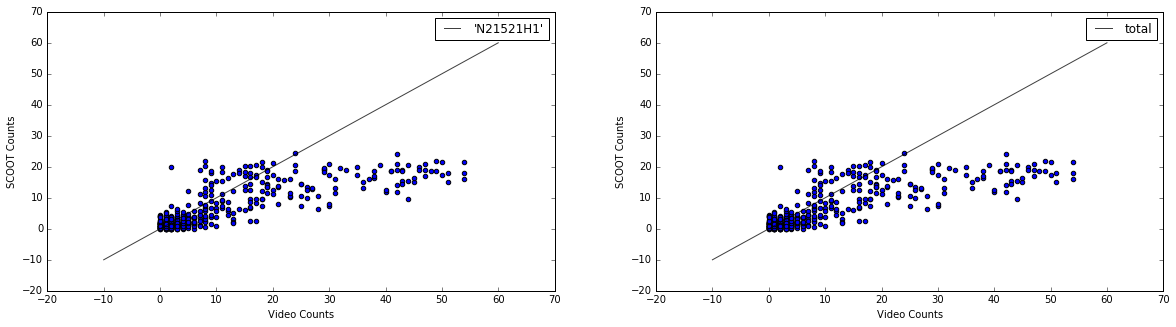

binsize = 180 seconds, Video Offset = 0 sec


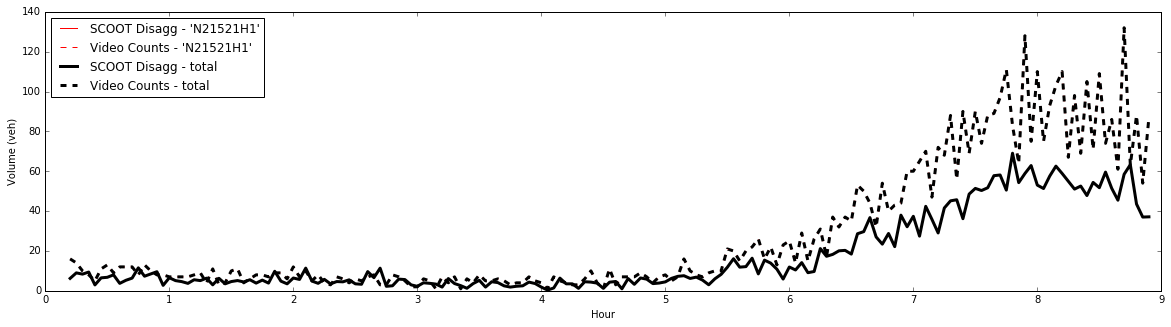

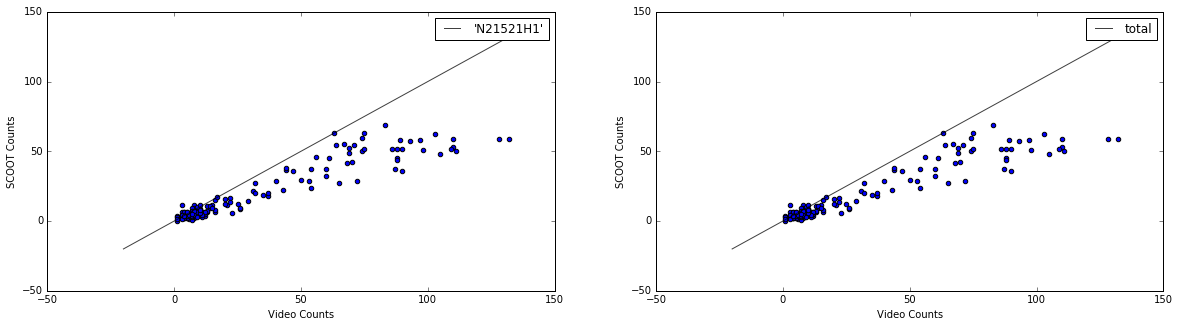

binsize = 300 seconds, Video Offset = 0 sec


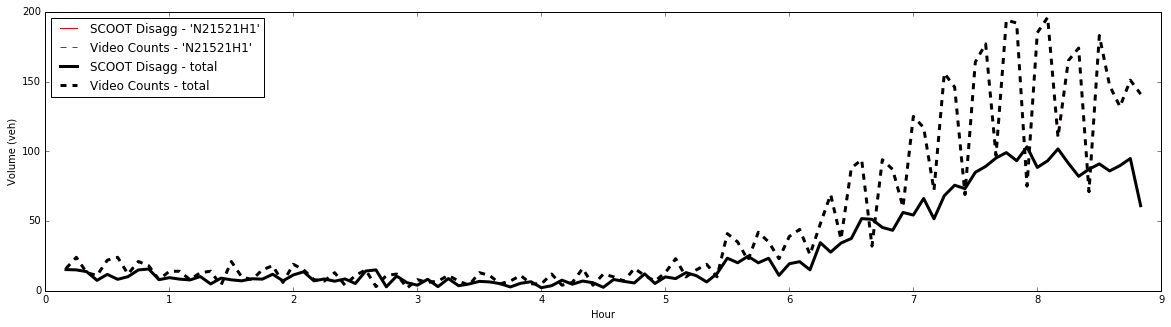

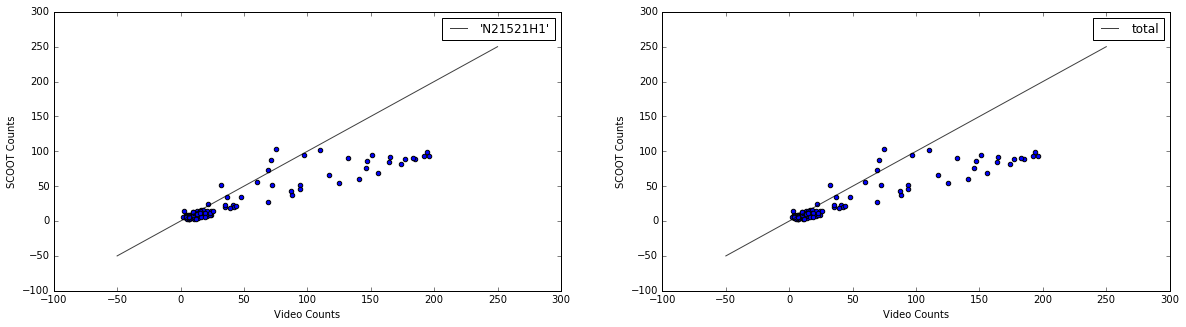

binsize = 900 seconds, Video Offset = 0 sec


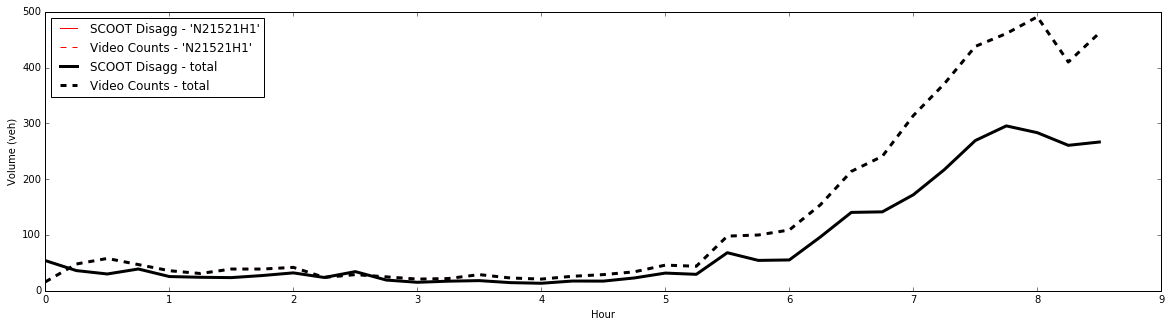

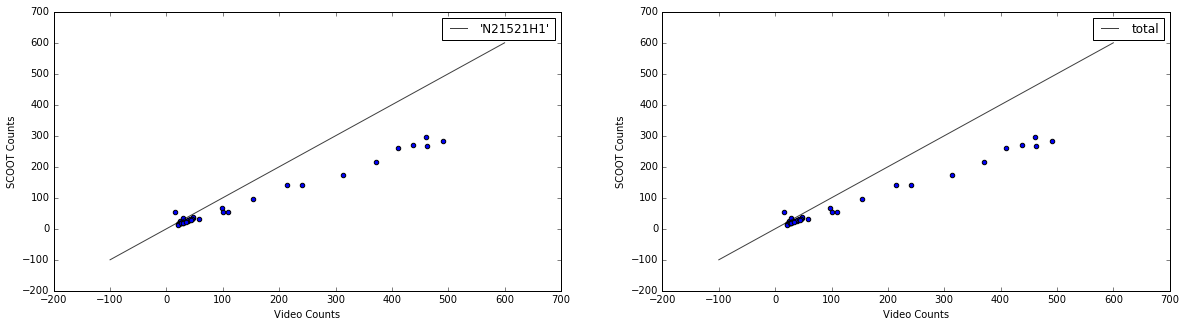

Bloor EB E of Church
binsize = 60 seconds, Video Offset = 0 sec


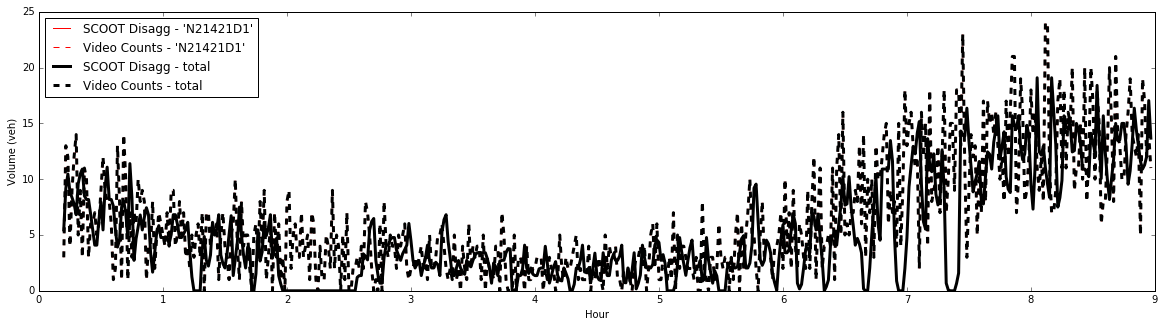

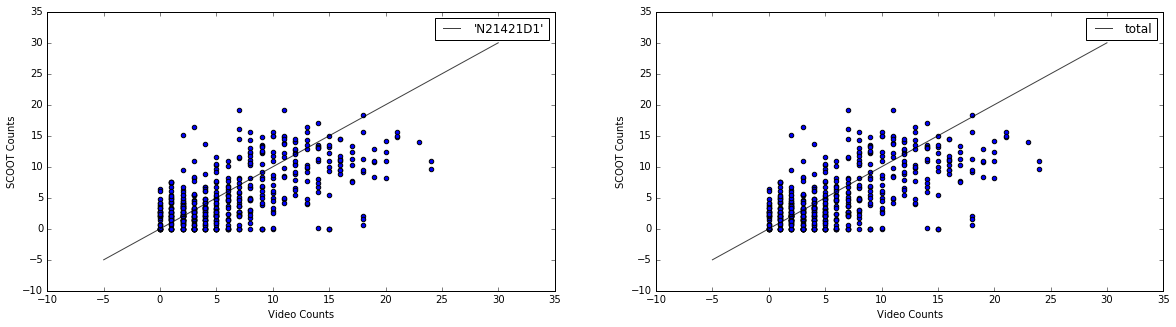

binsize = 180 seconds, Video Offset = 0 sec


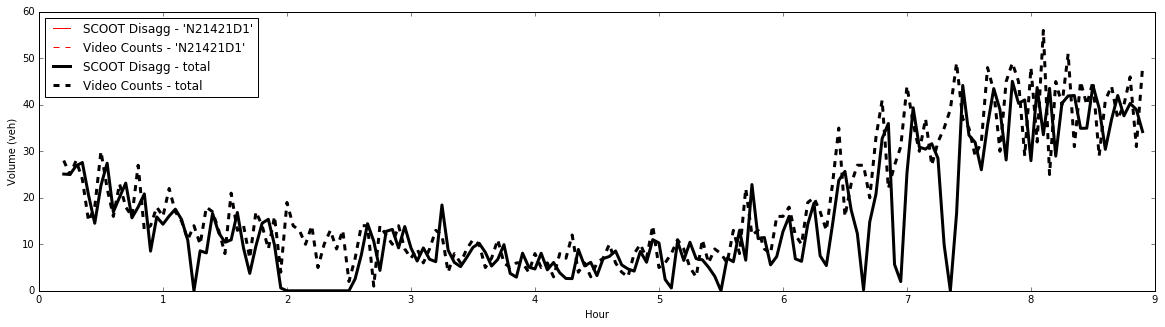

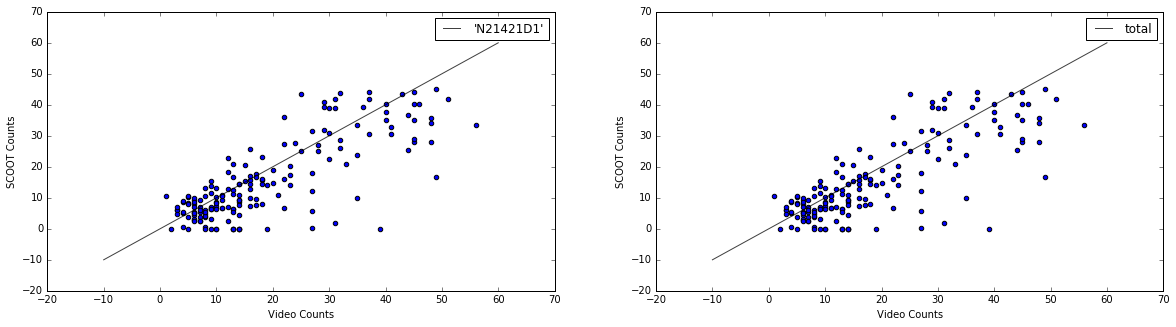

binsize = 300 seconds, Video Offset = 0 sec


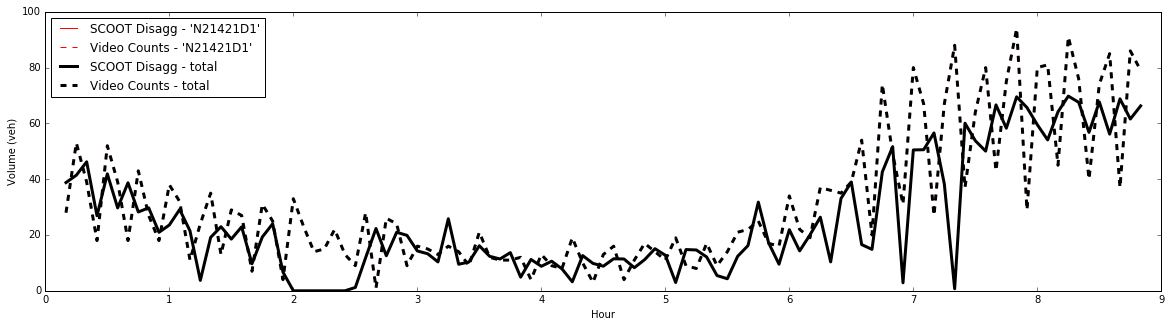

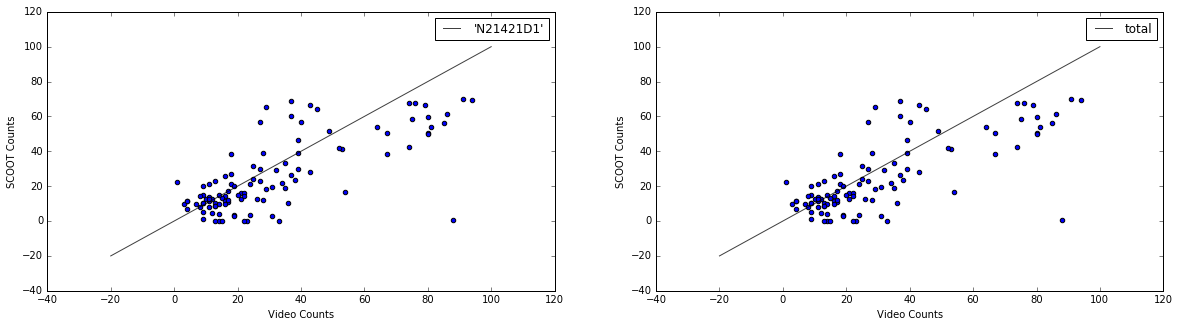

binsize = 900 seconds, Video Offset = 0 sec


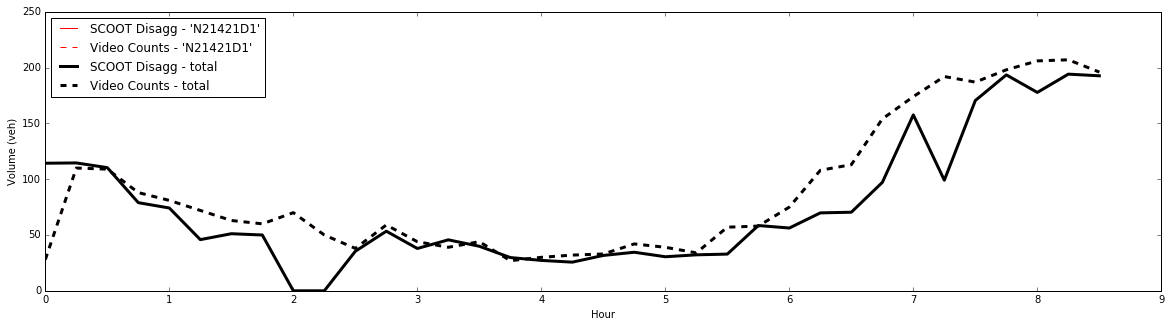

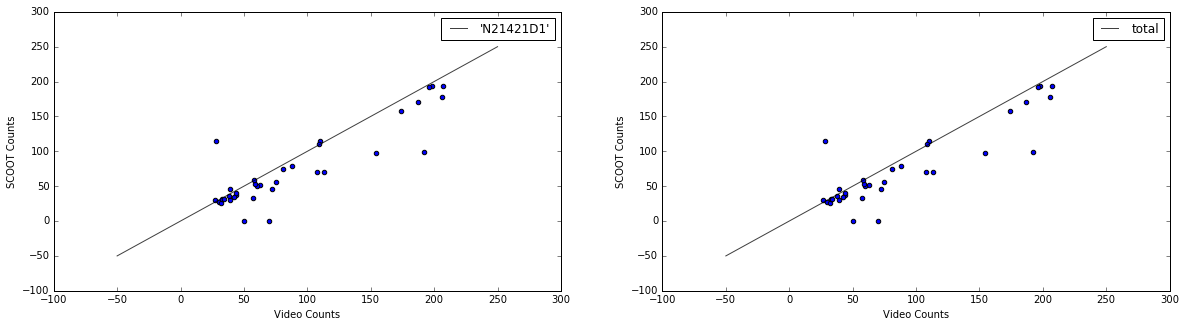

Bloor WB W of Church
binsize = 60 seconds, Video Offset = 0 sec


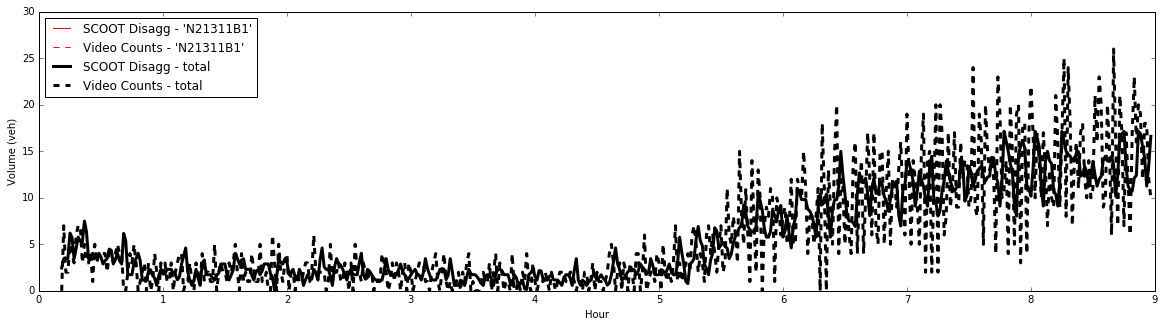

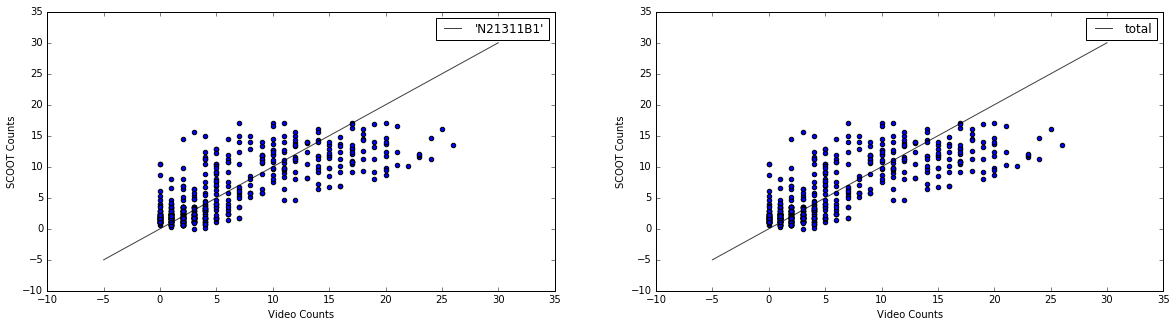

binsize = 180 seconds, Video Offset = 0 sec


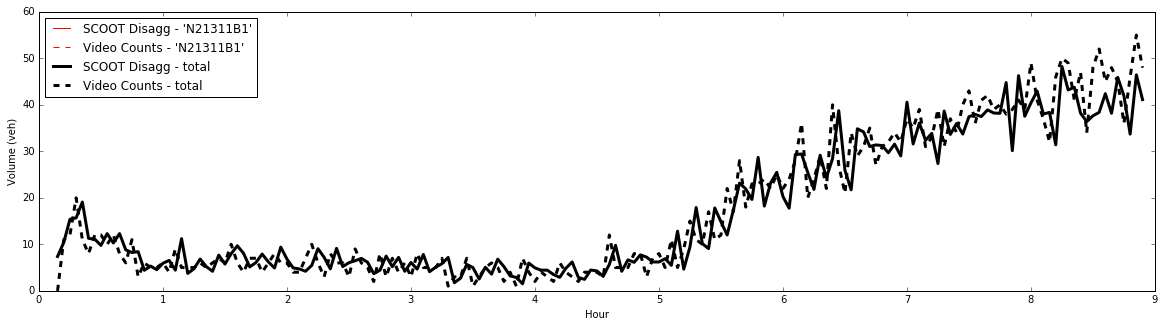

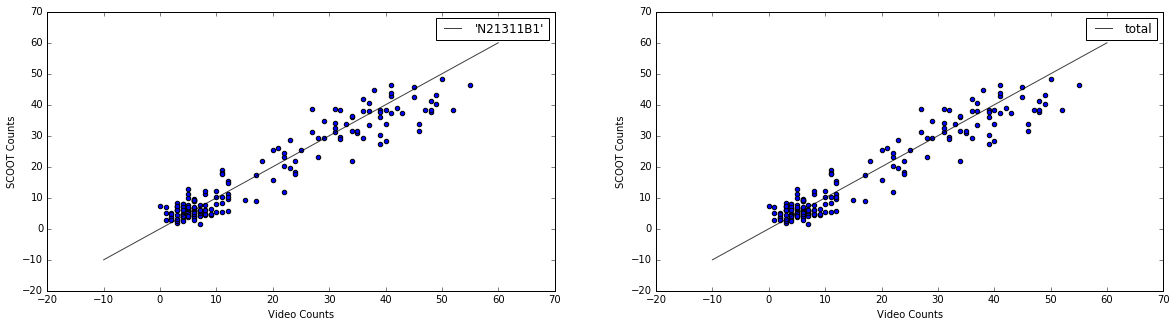

binsize = 300 seconds, Video Offset = 0 sec


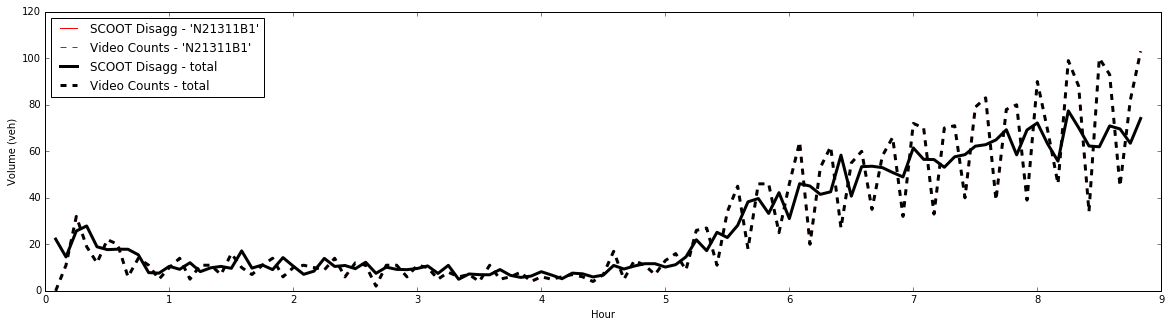

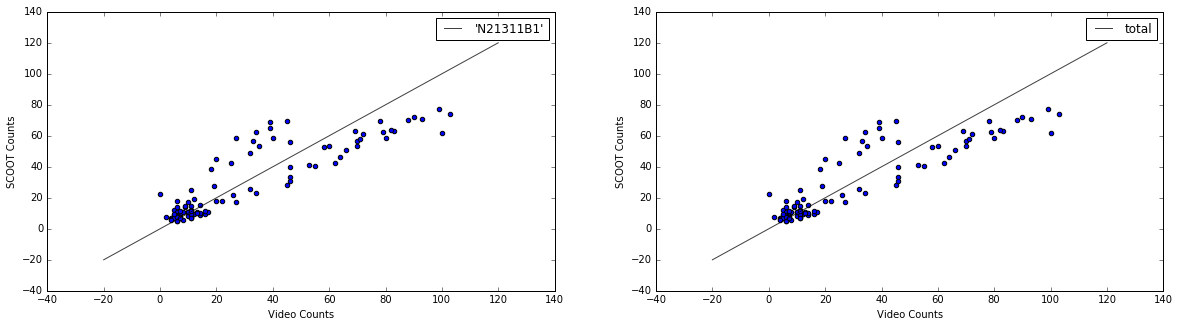

binsize = 900 seconds, Video Offset = 0 sec


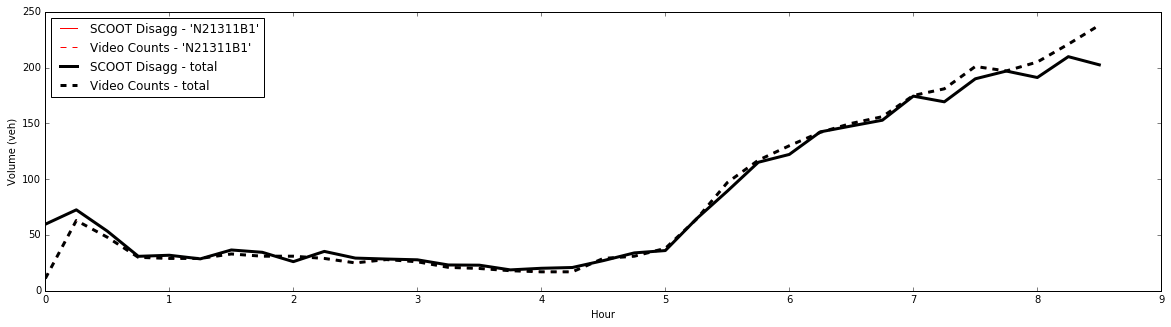

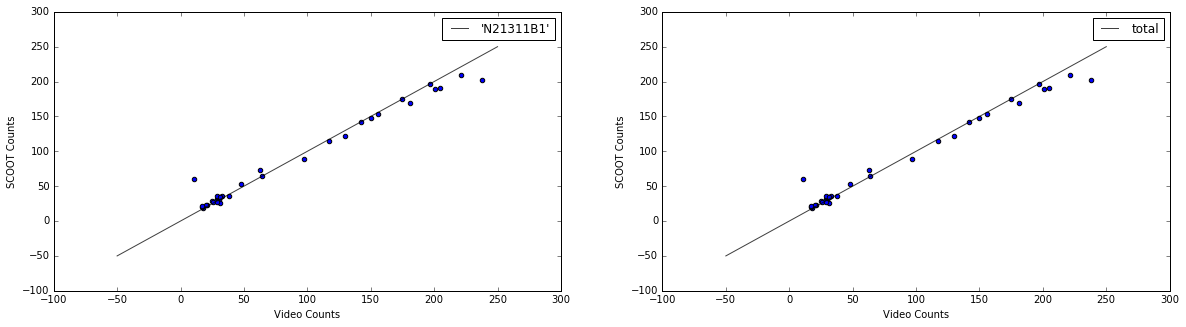

In [142]:
bin_sec_s=[60, 180, 300, 900]
start_hour = 0
start_min = 0
start_sec = 0
end_hour = 8
end_min = 59
end_sec = 59

start_time_sec = start_hour * 3600 + start_min * 60 + start_sec
end_time_sec = end_hour * 3600 + end_min * 60 + end_sec
s = scoot.copy()
s.reset_index(inplace=True,drop=True)

offsets = [0,0,0,0,0,0,0,0,0,0,0,0]


for i in range(len(locations)):

    sdet = sdetectors[i]
    tcl = centrelines[i]
    dir_bin = dir_bins[i]
    offset = offsets[i]
    
    # Filter relevant data
    r = video.copy()
    r = r[(r['centreline_id']==tcl) & (r['dir_bin']==dir_bin)]
    s = scoot[scoot['detector'].isin([x.strip('\'') for x in sdet])].copy()
    # Offset video 
    r['seconds']=r['seconds']+offset
    
    print(locations[i])

    for bin_sec in bin_sec_s:
        print('binsize =', bin_sec , 'seconds, Video Offset =', offset, 'sec')
        fig,axx = plt.subplots(figsize=(20,5))

        num_bins = (end_time_sec - start_time_sec)//bin_sec
        min_bins_start = list(np.linspace(start_time_sec, start_time_sec+bin_sec*num_bins, num_bins+1))
        
        # Create bin index
        r['bin'] = r['seconds']//bin_sec
        # Aggregate individual detectors
        r = aggregate_lanes(r, aggregation[i])
    
        r['seconds'] = r['bin']*bin_sec
        r = r[(r['seconds']>=start_time_sec) & (r['seconds']<=(end_time_sec-bin_sec))]
        min_bins_start = [x for x in min_bins_start if (x in list(r['seconds']) or x==start_time_sec+bin_sec*num_bins)]
        r0 = r.groupby(['centreline_id','dir_bin','count_date','bin'], as_index=False).sum()

        fig,(ax) = plt.subplots(1,len(sdet)+1,figsize=(20,5))

        for det in range(len(sdet)):

            v = aggregate_data(min_bins_start, s[s['detector'] == sdet[det].strip('\'')],'Volume')
            axx.plot([x/3600 for x in min_bins_start[:-1]],v,colors[det],label='SCOOT Disagg - ' + sdet[det])
            axx.plot([x/3600 for x in min_bins_start[:-1]],r0['detector'+str(det)],colors[det]+'--',label='Video Counts - ' + sdet[det])

            ax[det].scatter(r0['detector'+str(det)],v)
            ax[det].set_xlabel('Video Counts')
            ax[det].set_ylabel('SCOOT Counts')
            add_y_eq_x(ax[det],sdet[det])
            ax[det].legend()

        s0 = s.groupby(['seconds','CycleTime'], as_index=False).sum()
        v = aggregate_data(min_bins_start, s0, 'Volume')
        
        det = det + 1
        axx.plot([x/3600 for x in min_bins_start[:-1]],v,colors[-1], label='SCOOT Disagg - total',linewidth=3)
        axx.plot([x/3600 for x in min_bins_start[:-1]],r0['Volume'],colors[-1]+'--', label='Video Counts - total', linewidth=3)

        ax[det].scatter(r0['Volume'],v)
        ax[det].set_xlabel('Video Counts')
        ax[det].set_ylabel('SCOOT Counts')
        add_y_eq_x(ax[det], 'total')
        ax[det].legend()

        axx.set_ylabel('Volume (veh)')
        axx.set_xlabel('Hour')
        axx.legend(loc=2)
        plt.show()